In [ ]:
import pandas as pd
import numpy as np
from numpy.random import rand
from numpy import array
from numpy import hstack
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras import optimizers 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_shangai=pd.read_csv("/content/shanghai.csv")
df_shangai

date  AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  \
0     2021/1/1    55.53      37.89     58.21     9.74    57.11   22.37   
1     2021/1/2    72.88      53.17     64.71     9.29    65.96   26.58   
2     2021/1/3    65.39      42.30     51.26     5.22    53.52   32.09   
3     2021/1/4    42.12      20.71     41.88     4.79    51.71   34.17   
4     2021/1/5    48.92      32.12     45.21     5.71    31.25   53.38   
..         ...      ...        ...       ...      ...      ...     ...   
473  2022/4/19    55.62      38.29     55.62     8.25    25.58  122.42   
474  2022/4/20    71.29      43.71     70.50    10.25    23.42  148.54   
475  2022/4/21    66.50      45.88     57.25     7.58    17.25  145.33   
476  2022/4/22    53.08      36.54     47.67    10.12    24.42  116.08   
477  2022/4/23    33.21      16.96     17.25     5.54    14.96   90.46   

     CO_24h  l_temp  h_temp  temp  wet  wind   hpa  visibility  precipitation  \
0      0.83    -2.7     3.9   0.1   45   0.1  1030        22.5            0.0   
1      0.90    -0.9     7.0   2.8   53   0.3  1030        14.7            0.0   
2      0.62     2.0    10.2   6.6   74   0.3  1030        17.1            0.0   
3      0.45     7.2    12.9   9.6   75   0.3  1027        17.7            0.0   
4      0.54     5.0     9.1   7.5   69   0.6  1029        14.9            0.0   
..      ...     ...     ...   ...  ...   ...   ...         ...            ...   
473    0.81    13.1    21.8  17.4   53   0.4  1018        16.8            0.0   
474    0.87    14.1    24.4  19.2   53   0.7  1015        13.7            0.0   
475    0.91    14.9    26.2  19.6   74   0.6  1011         9.4            3.3   
476    0.94    17.1    28.9  22.6   67   0.5  1010        13.5            0.0   
477    0.79    17.6    21.9  19.1   97   0.6  1010        11.9           29.6   

     cloud  
0       10  
1        8  
2       10  
3       36  
4       76  
..     ...  
473     46  
474     48  
475     35  
476     61  
477     89  

[478 rows x 17 columns]

In [ ]:
df_shangai.shape

(478, 17)

In [ ]:
df_shangai.columns

Index(['date', 'AQI_24h', 'PM2.5_24h', 'PM10_24h', 'SO2_24h', 'NO2_24h',
       'O3_24h', 'CO_24h', 'l_temp', 'h_temp', 'temp', 'wet', 'wind', 'hpa',
       'visibility', 'precipitation', 'cloud'],
      dtype='object')

In [ ]:
df_shangai.dtypes

date              object
AQI_24h          float64
PM2.5_24h        float64
PM10_24h         float64
SO2_24h          float64
NO2_24h          float64
O3_24h           float64
CO_24h           float64
l_temp           float64
h_temp           float64
temp             float64
wet                int64
wind             float64
hpa                int64
visibility       float64
precipitation    float64
cloud              int64
dtype: object

In [ ]:
df_shangai.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
473    False
474    False
475    False
476    False
477    False
Length: 478, dtype: bool

In [ ]:
df_shangai.isnull().sum()


date             0
AQI_24h          0
PM2.5_24h        0
PM10_24h         0
SO2_24h          0
NO2_24h          0
O3_24h           0
CO_24h           0
l_temp           0
h_temp           0
temp             0
wet              0
wind             0
hpa              0
visibility       0
precipitation    0
cloud            0
dtype: int64

In [ ]:
df_shangai.describe()

AQI_24h   PM2.5_24h    PM10_24h     SO2_24h     NO2_24h      O3_24h  \
count  478.000000  478.000000  478.000000  478.000000  478.000000  478.000000   
mean    48.276464   28.621611   44.669979    5.683975   34.173013   65.713452   
std     23.510271   17.200097   27.131350    1.720962   16.355499   24.880974   
min     10.170000    3.580000    8.460000    3.960000    4.090000    8.500000   
25%     32.042500   15.520000   27.760000    4.627500   22.400000   48.592500   
50%     43.620000   24.480000   37.750000    5.170000   30.980000   64.310000   
75%     60.562500   36.987500   54.770000    6.110000   42.110000   82.115000   
max    245.290000  112.790000  309.880000   20.960000  113.670000  148.540000   

           CO_24h      l_temp      h_temp        temp         wet        wind  \
count  478.000000  478.000000  478.000000  478.000000  478.000000  478.000000   
mean     0.638117   13.903766   20.240377   16.779498   71.230126    0.975523   
std      0.177690    8.484342    8.974213    8.469892   15.948074    0.607334   
min      0.350000   -7.000000   -1.600000   -4.200000   29.000000    0.100000   
25%      0.510000    7.200000   12.650000    9.625000   60.000000    0.400000   
50%      0.605000   12.500000   19.650000   15.750000   72.000000    0.900000   
75%      0.720000   22.500000   28.500000   25.300000   83.000000    1.600000   
max      1.460000   29.200000   37.500000   32.400000  100.000000    2.700000   

               hpa  visibility  precipitation       cloud  
count   478.000000  478.000000     478.000000  478.000000  
mean   1017.092050   16.452301       3.921339   52.696653  
std       8.994285    7.261595      11.707369   30.638181  
min     987.000000    3.200000       0.000000    0.000000  
25%    1010.000000   10.200000       0.000000   27.000000  
50%    1018.000000   15.600000       0.000000   52.000000  
75%    1024.000000   22.675000       1.800000   80.000000  
max    1040.000000   30.000000     133.900000  100.000000

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

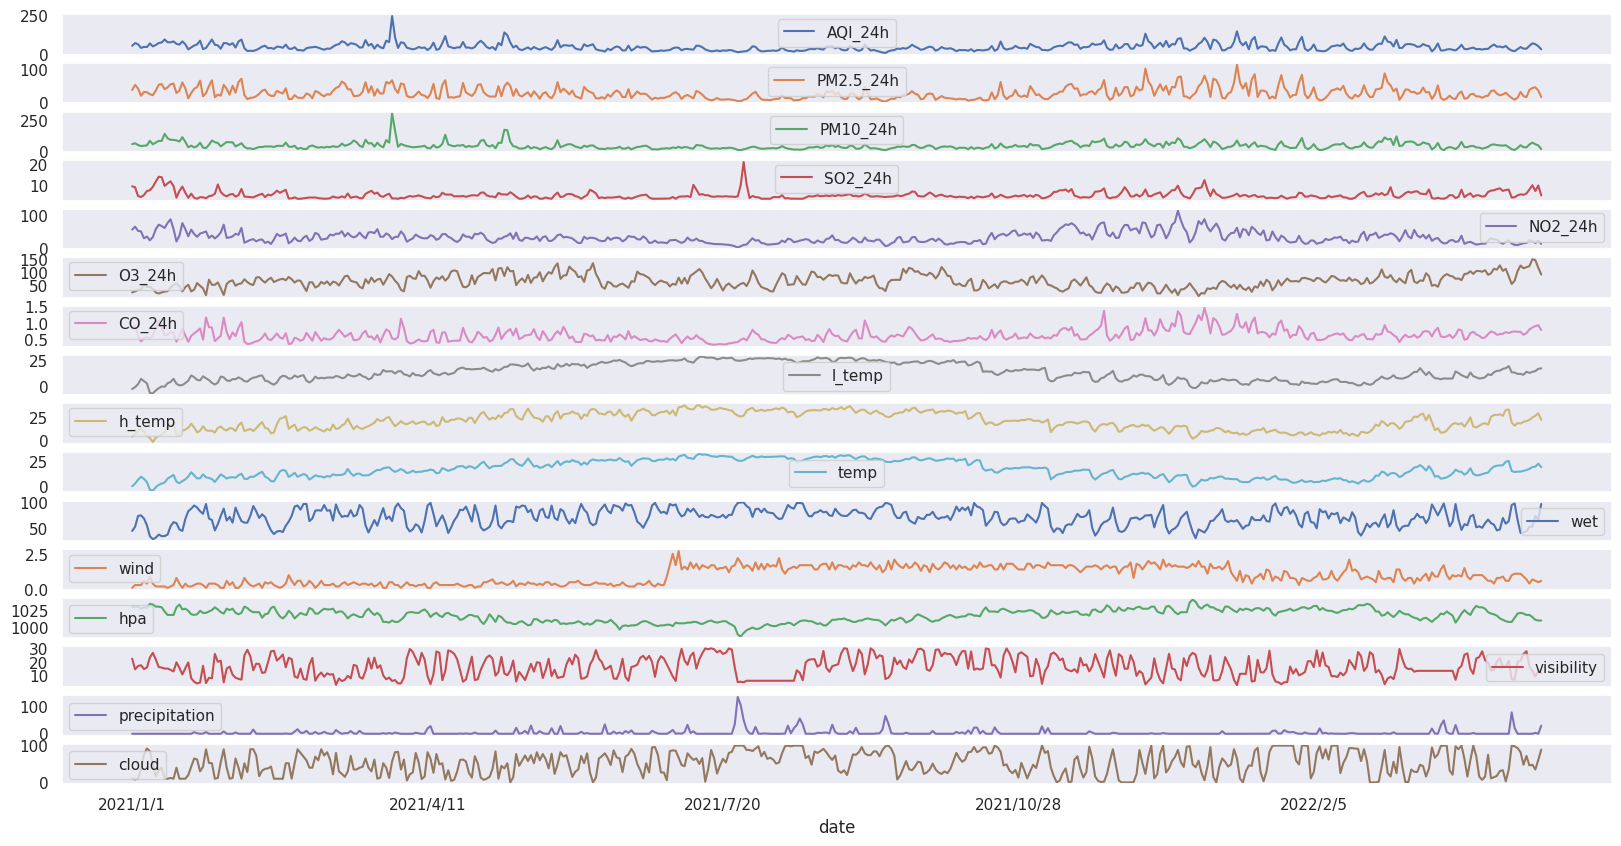

In [ ]:
df_shangai.set_index('date')[['AQI_24h','PM2.5_24h','PM10_24h','SO2_24h','NO2_24h','O3_24h','CO_24h','l_temp','h_temp','temp','wet','wind','hpa','visibility','precipitation','cloud']].plot(subplots=True)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

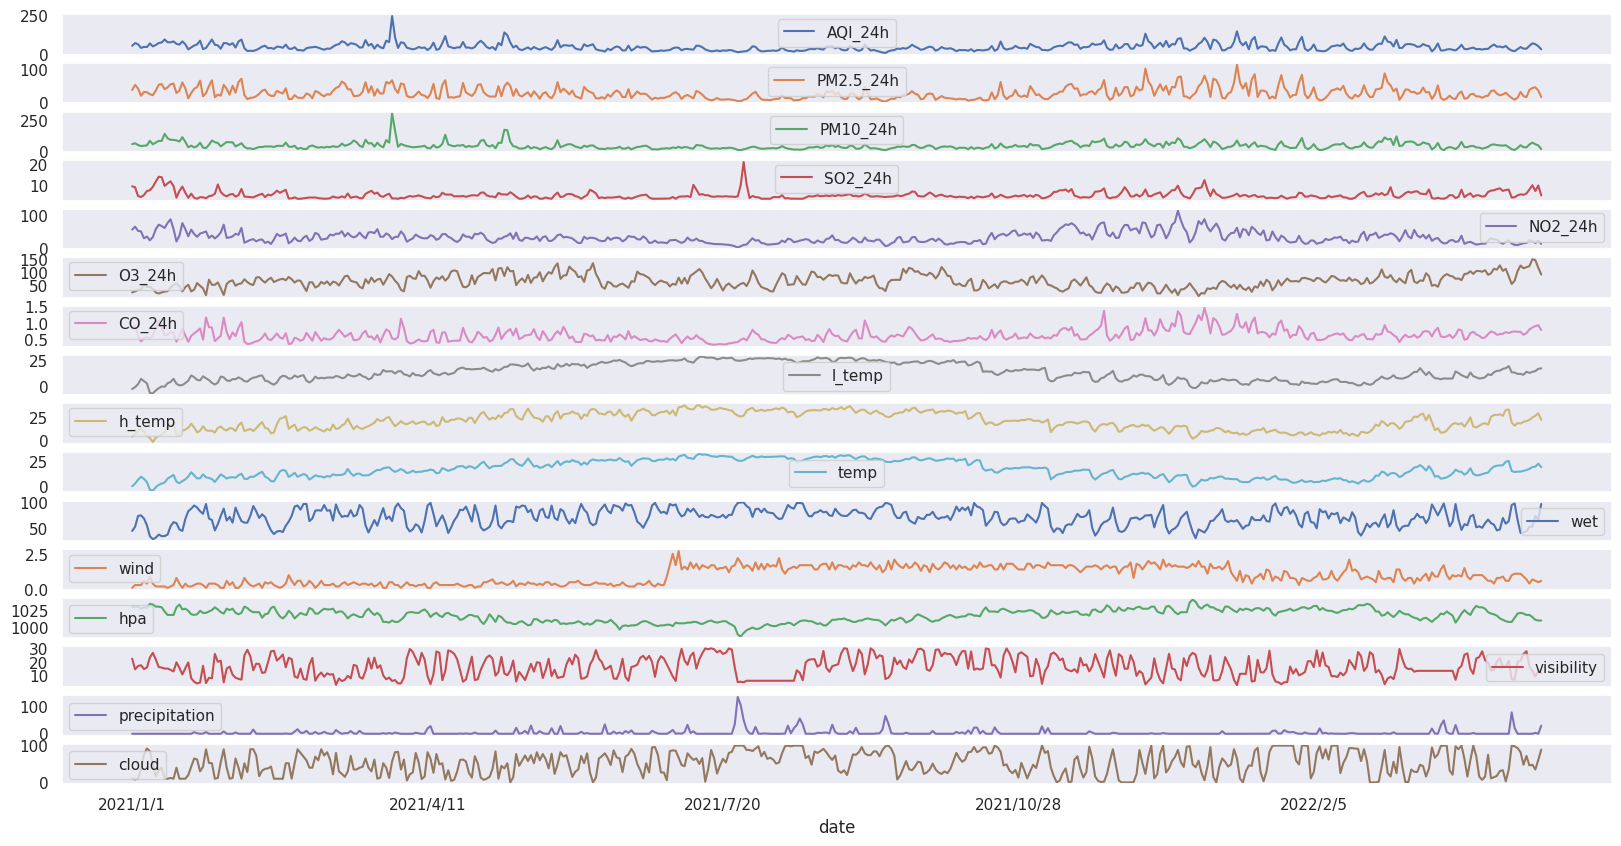

In [ ]:
df_shangai.set_index('date')[['AQI_24h','PM2.5_24h','PM10_24h','SO2_24h','NO2_24h','O3_24h','CO_24h','l_temp','h_temp','temp','wet','wind','hpa','visibility','precipitation','cloud']].plot(subplots=True)

Plotting auto correaltion between AQI vs time

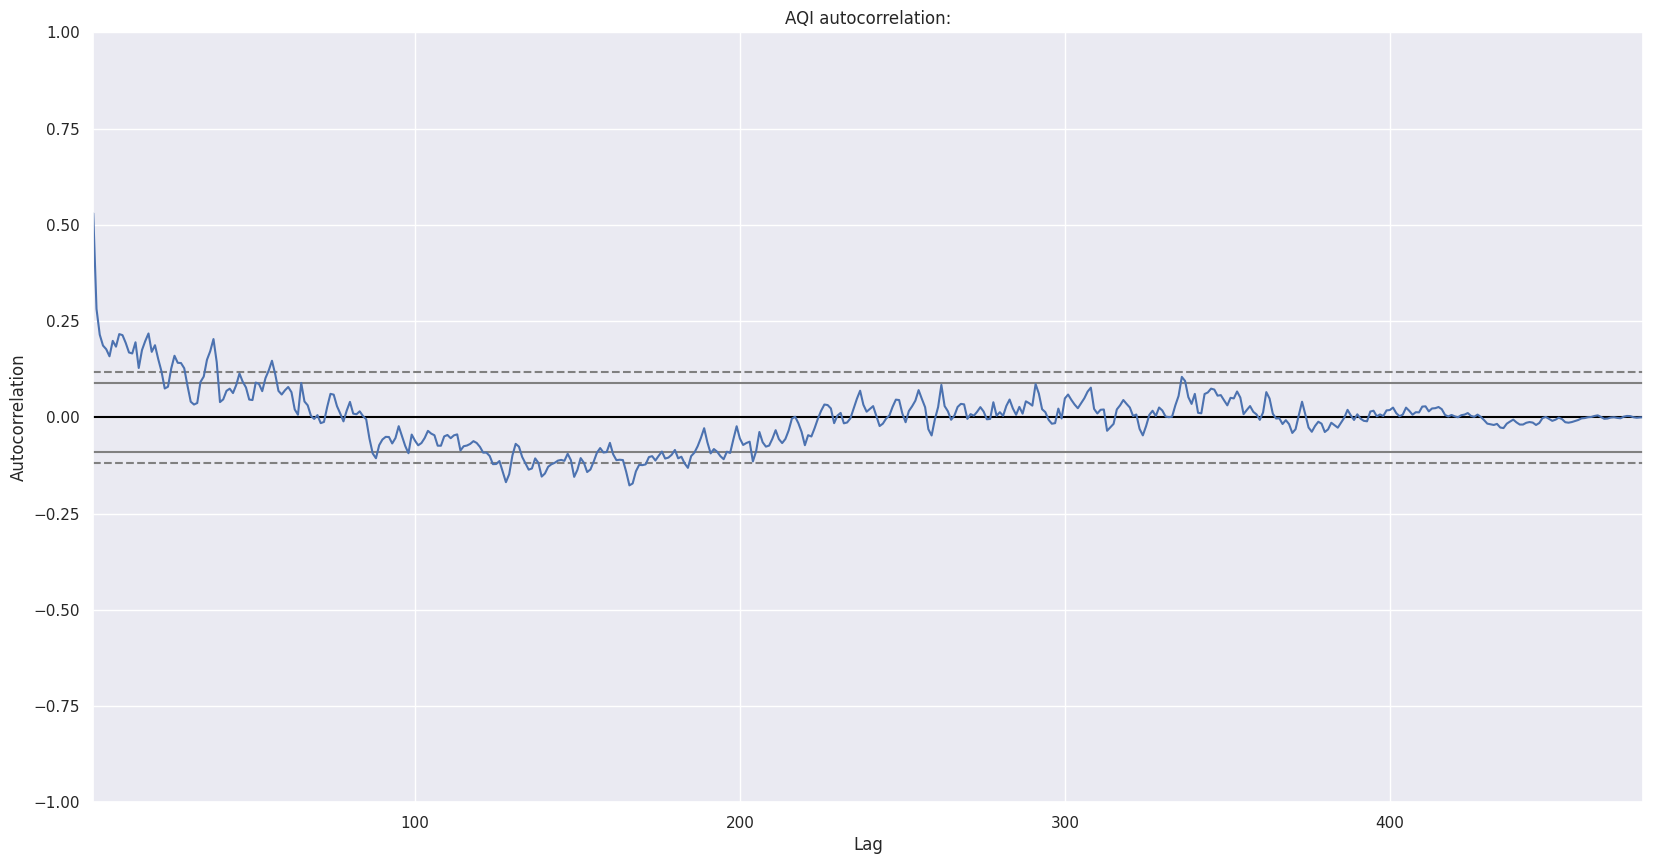

In [ ]:
pd.plotting.autocorrelation_plot(df_shangai['AQI_24h'])
plt.title('AQI autocorrelation:')
plt.show()

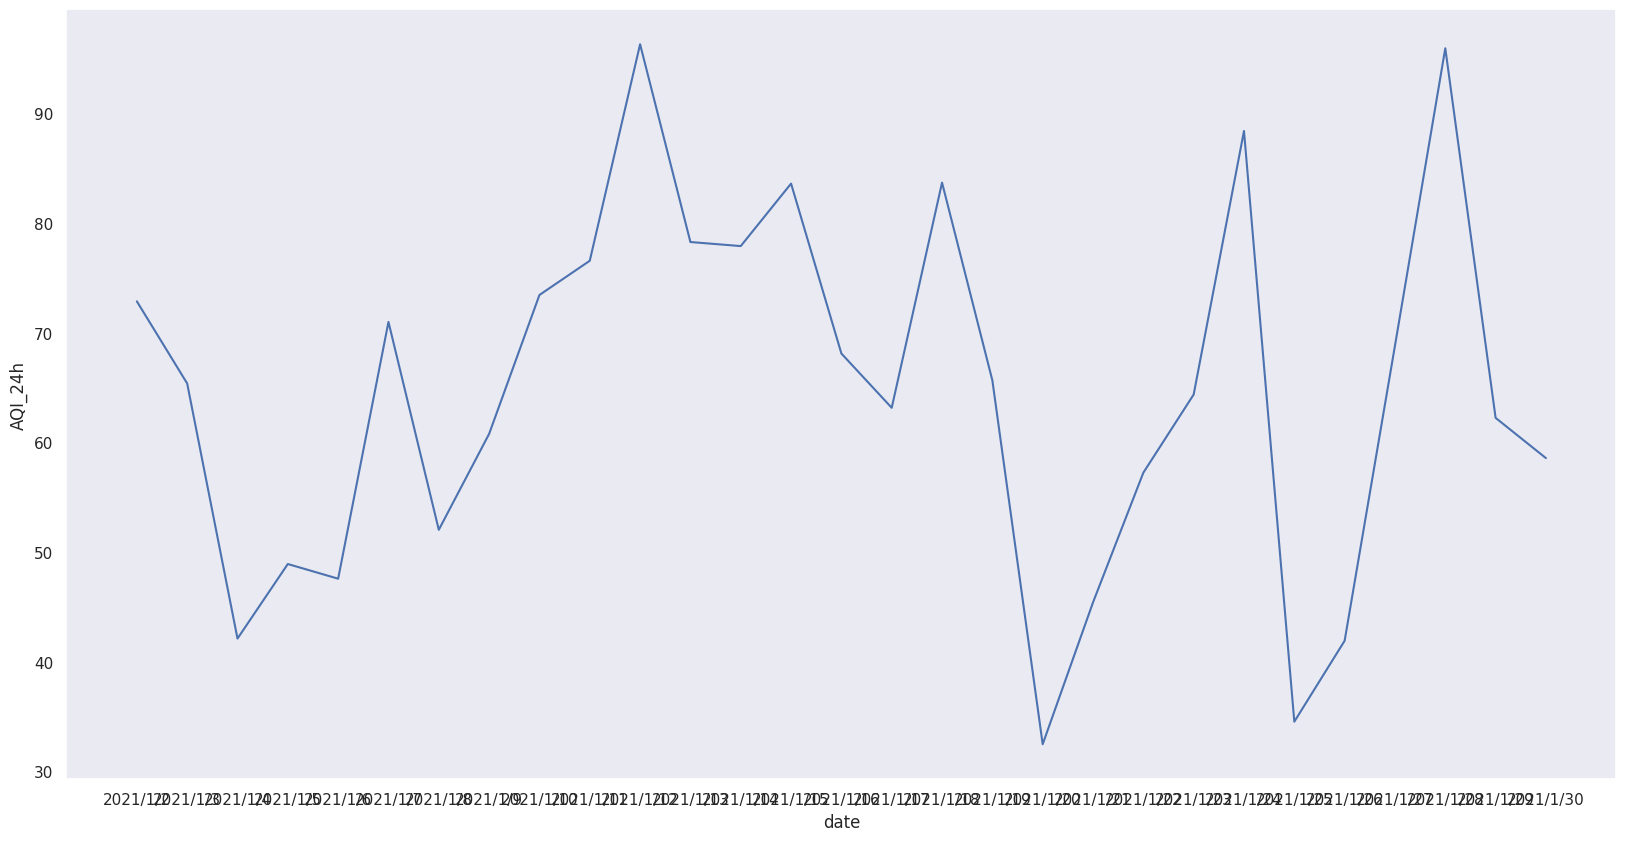

In [ ]:
df_shangai_1=df_shangai.iloc[1:30,]
sns.lineplot(x=df_shangai_1['date'],y=df_shangai_1['AQI_24h'],data=df_shangai_1)
plt.show()

<ipython-input-67-b76bbde21ed4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_shangai.corr(),annot=True,cmap='Purples')


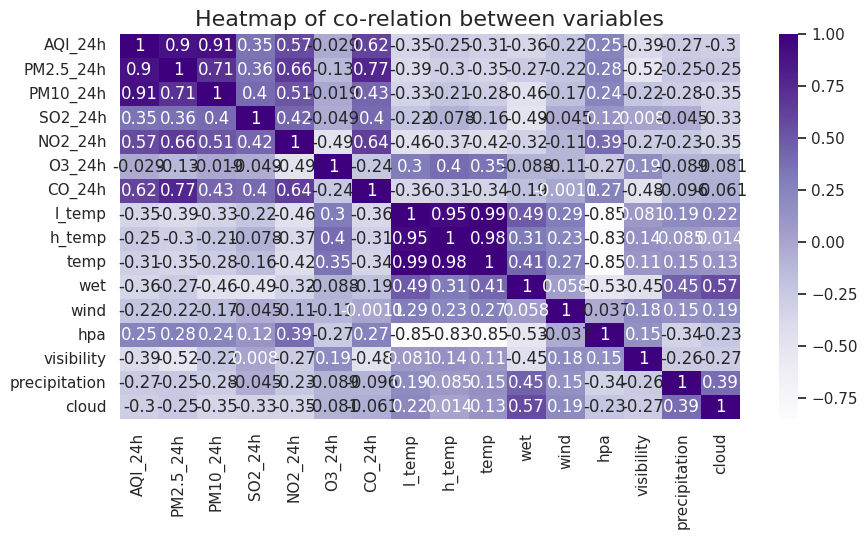

In [ ]:
sns.set(rc={'figure.figsize': (10, 5)})
sns.heatmap(df_shangai.corr(),annot=True,cmap='Purples')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

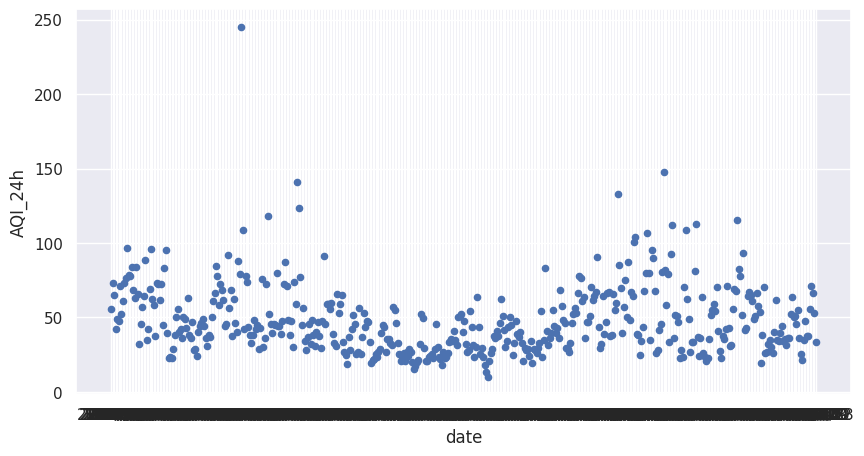

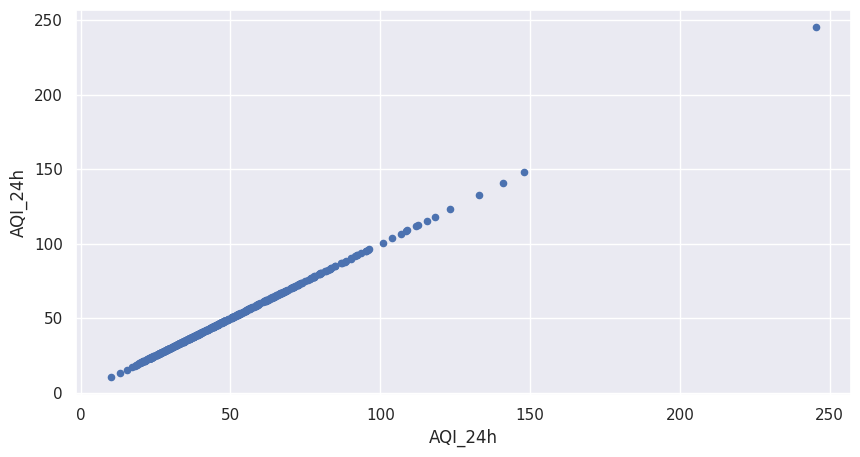

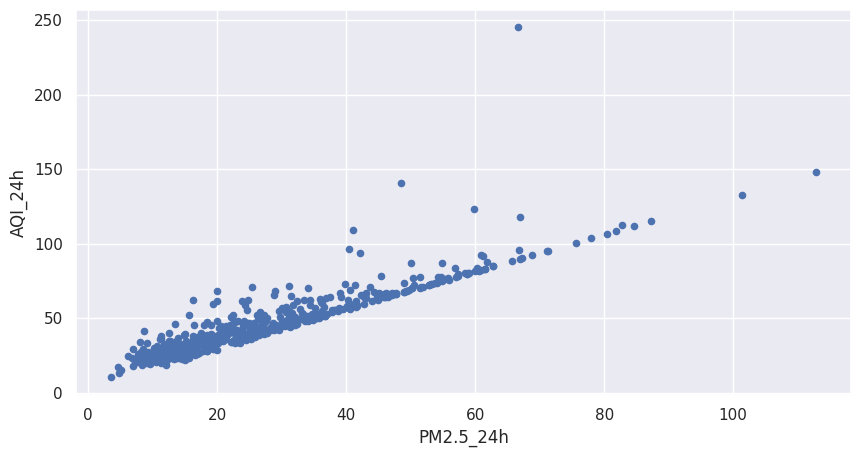

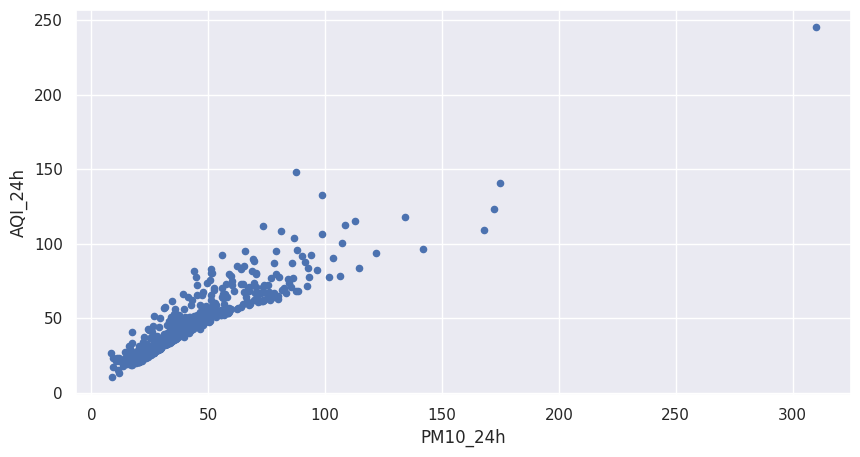

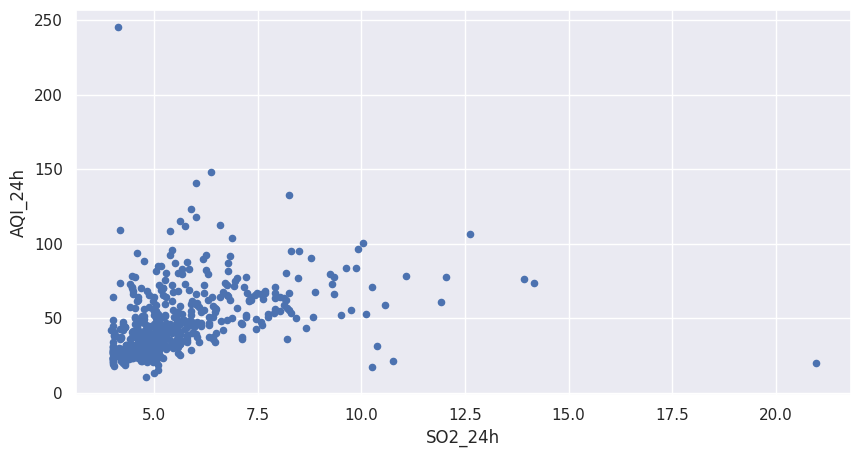

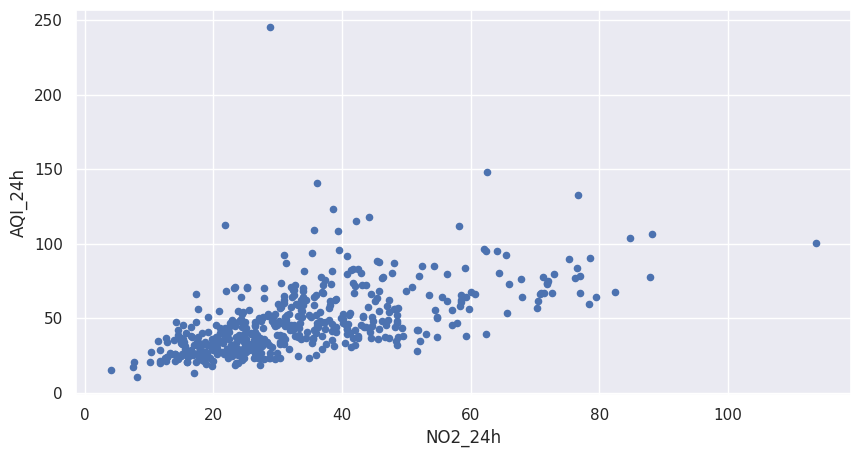

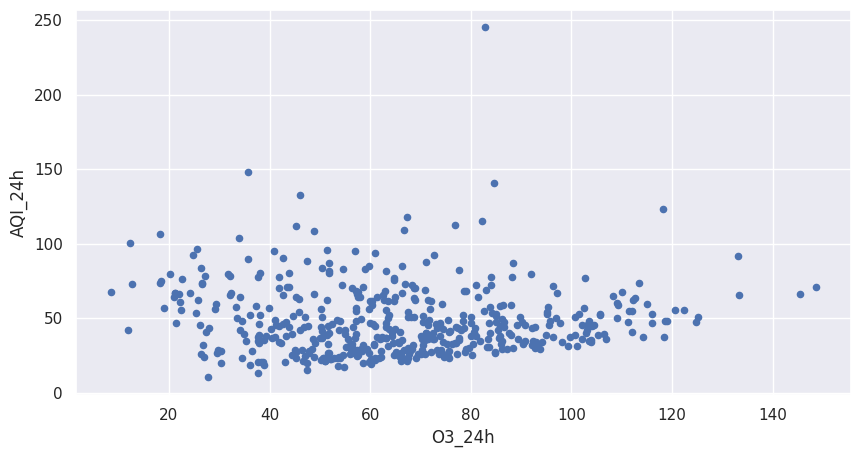

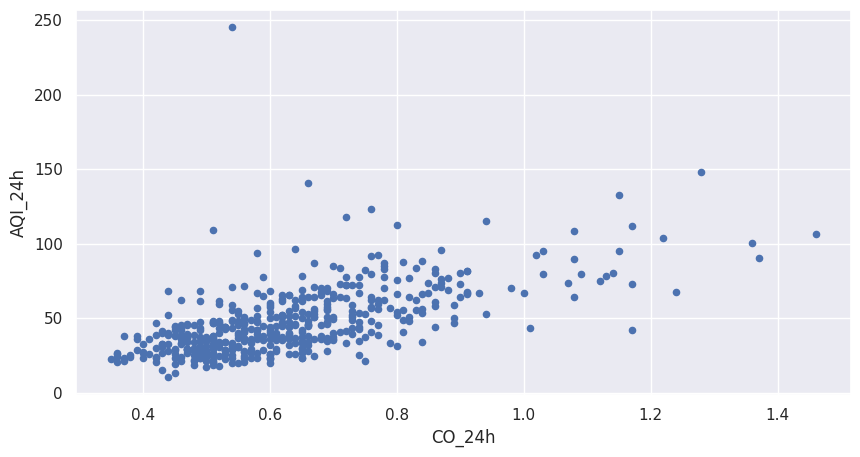

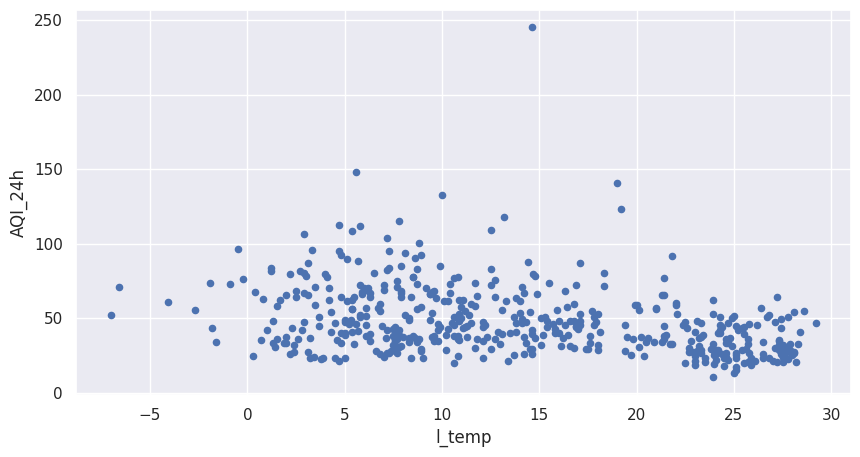

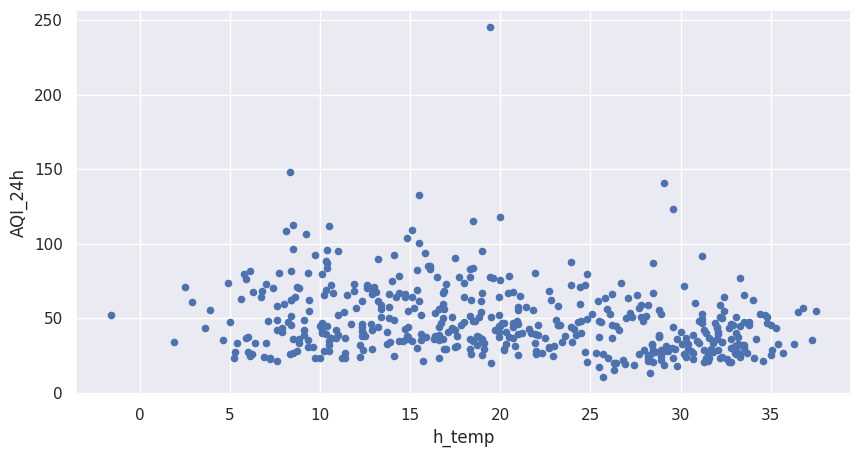

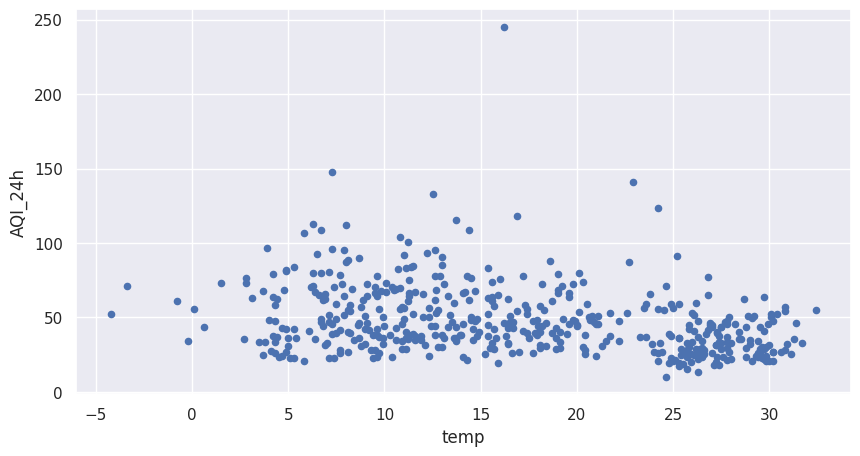

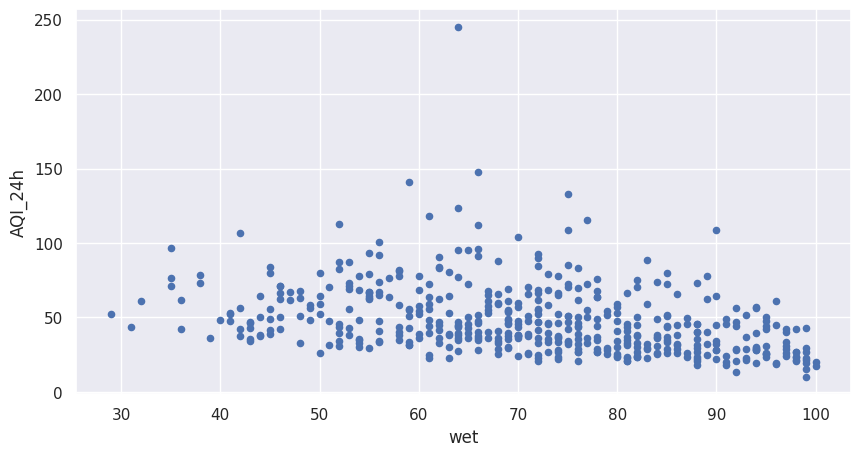

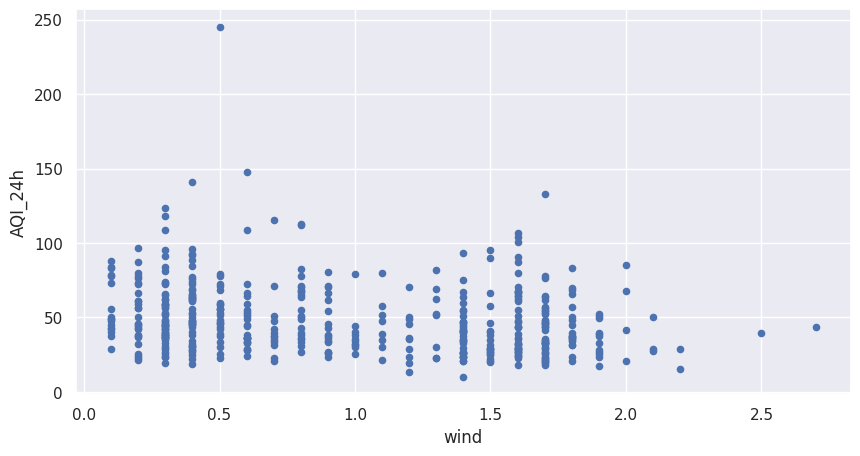

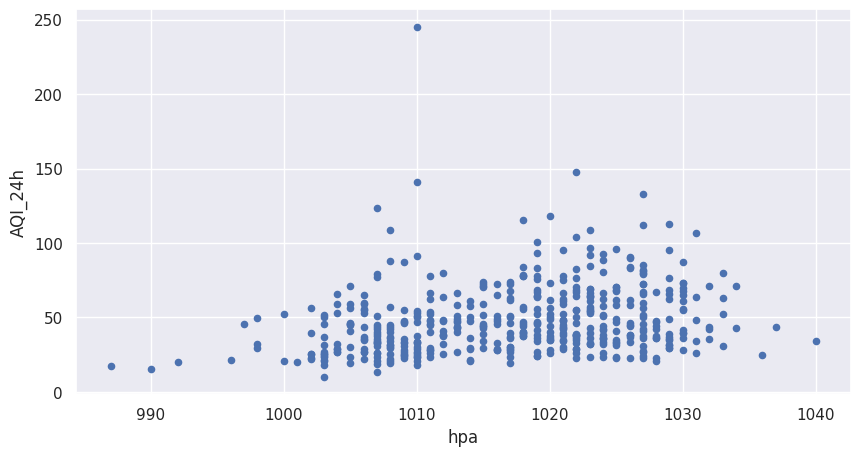

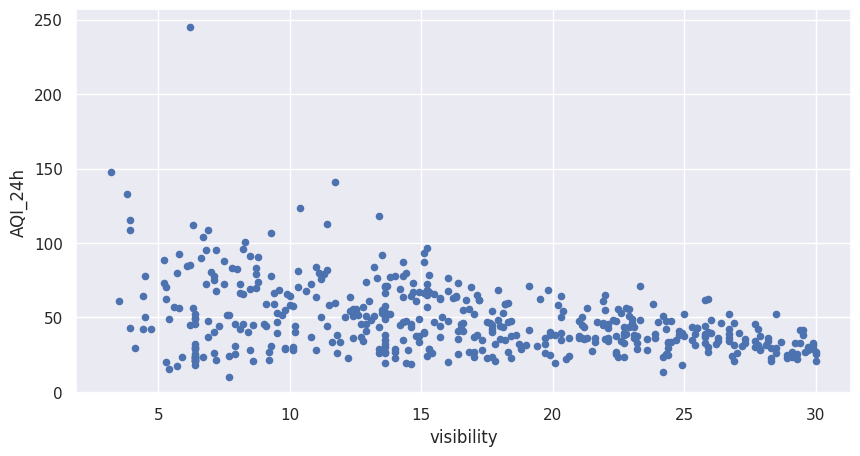

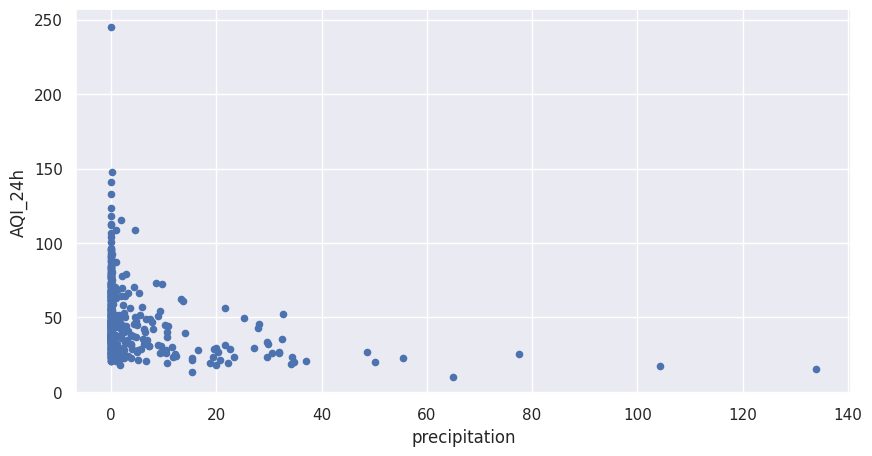

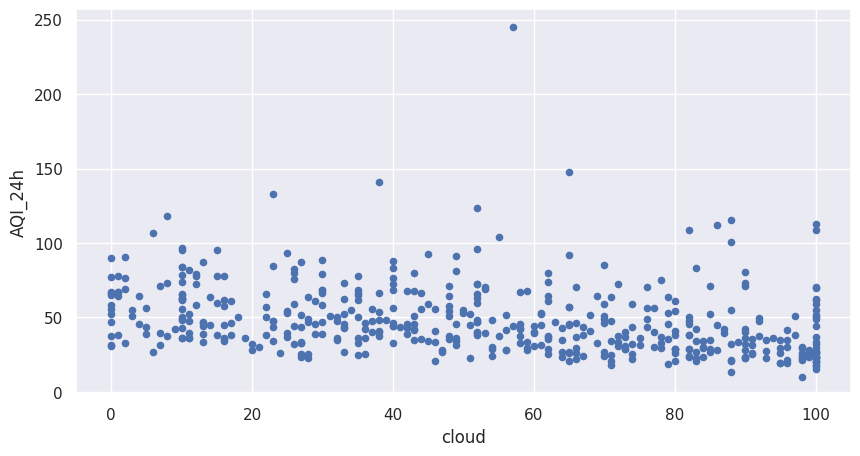

In [ ]:
for i in df_shangai.columns:

    df_shangai.plot(kind='scatter',x=i,y='AQI_24h')

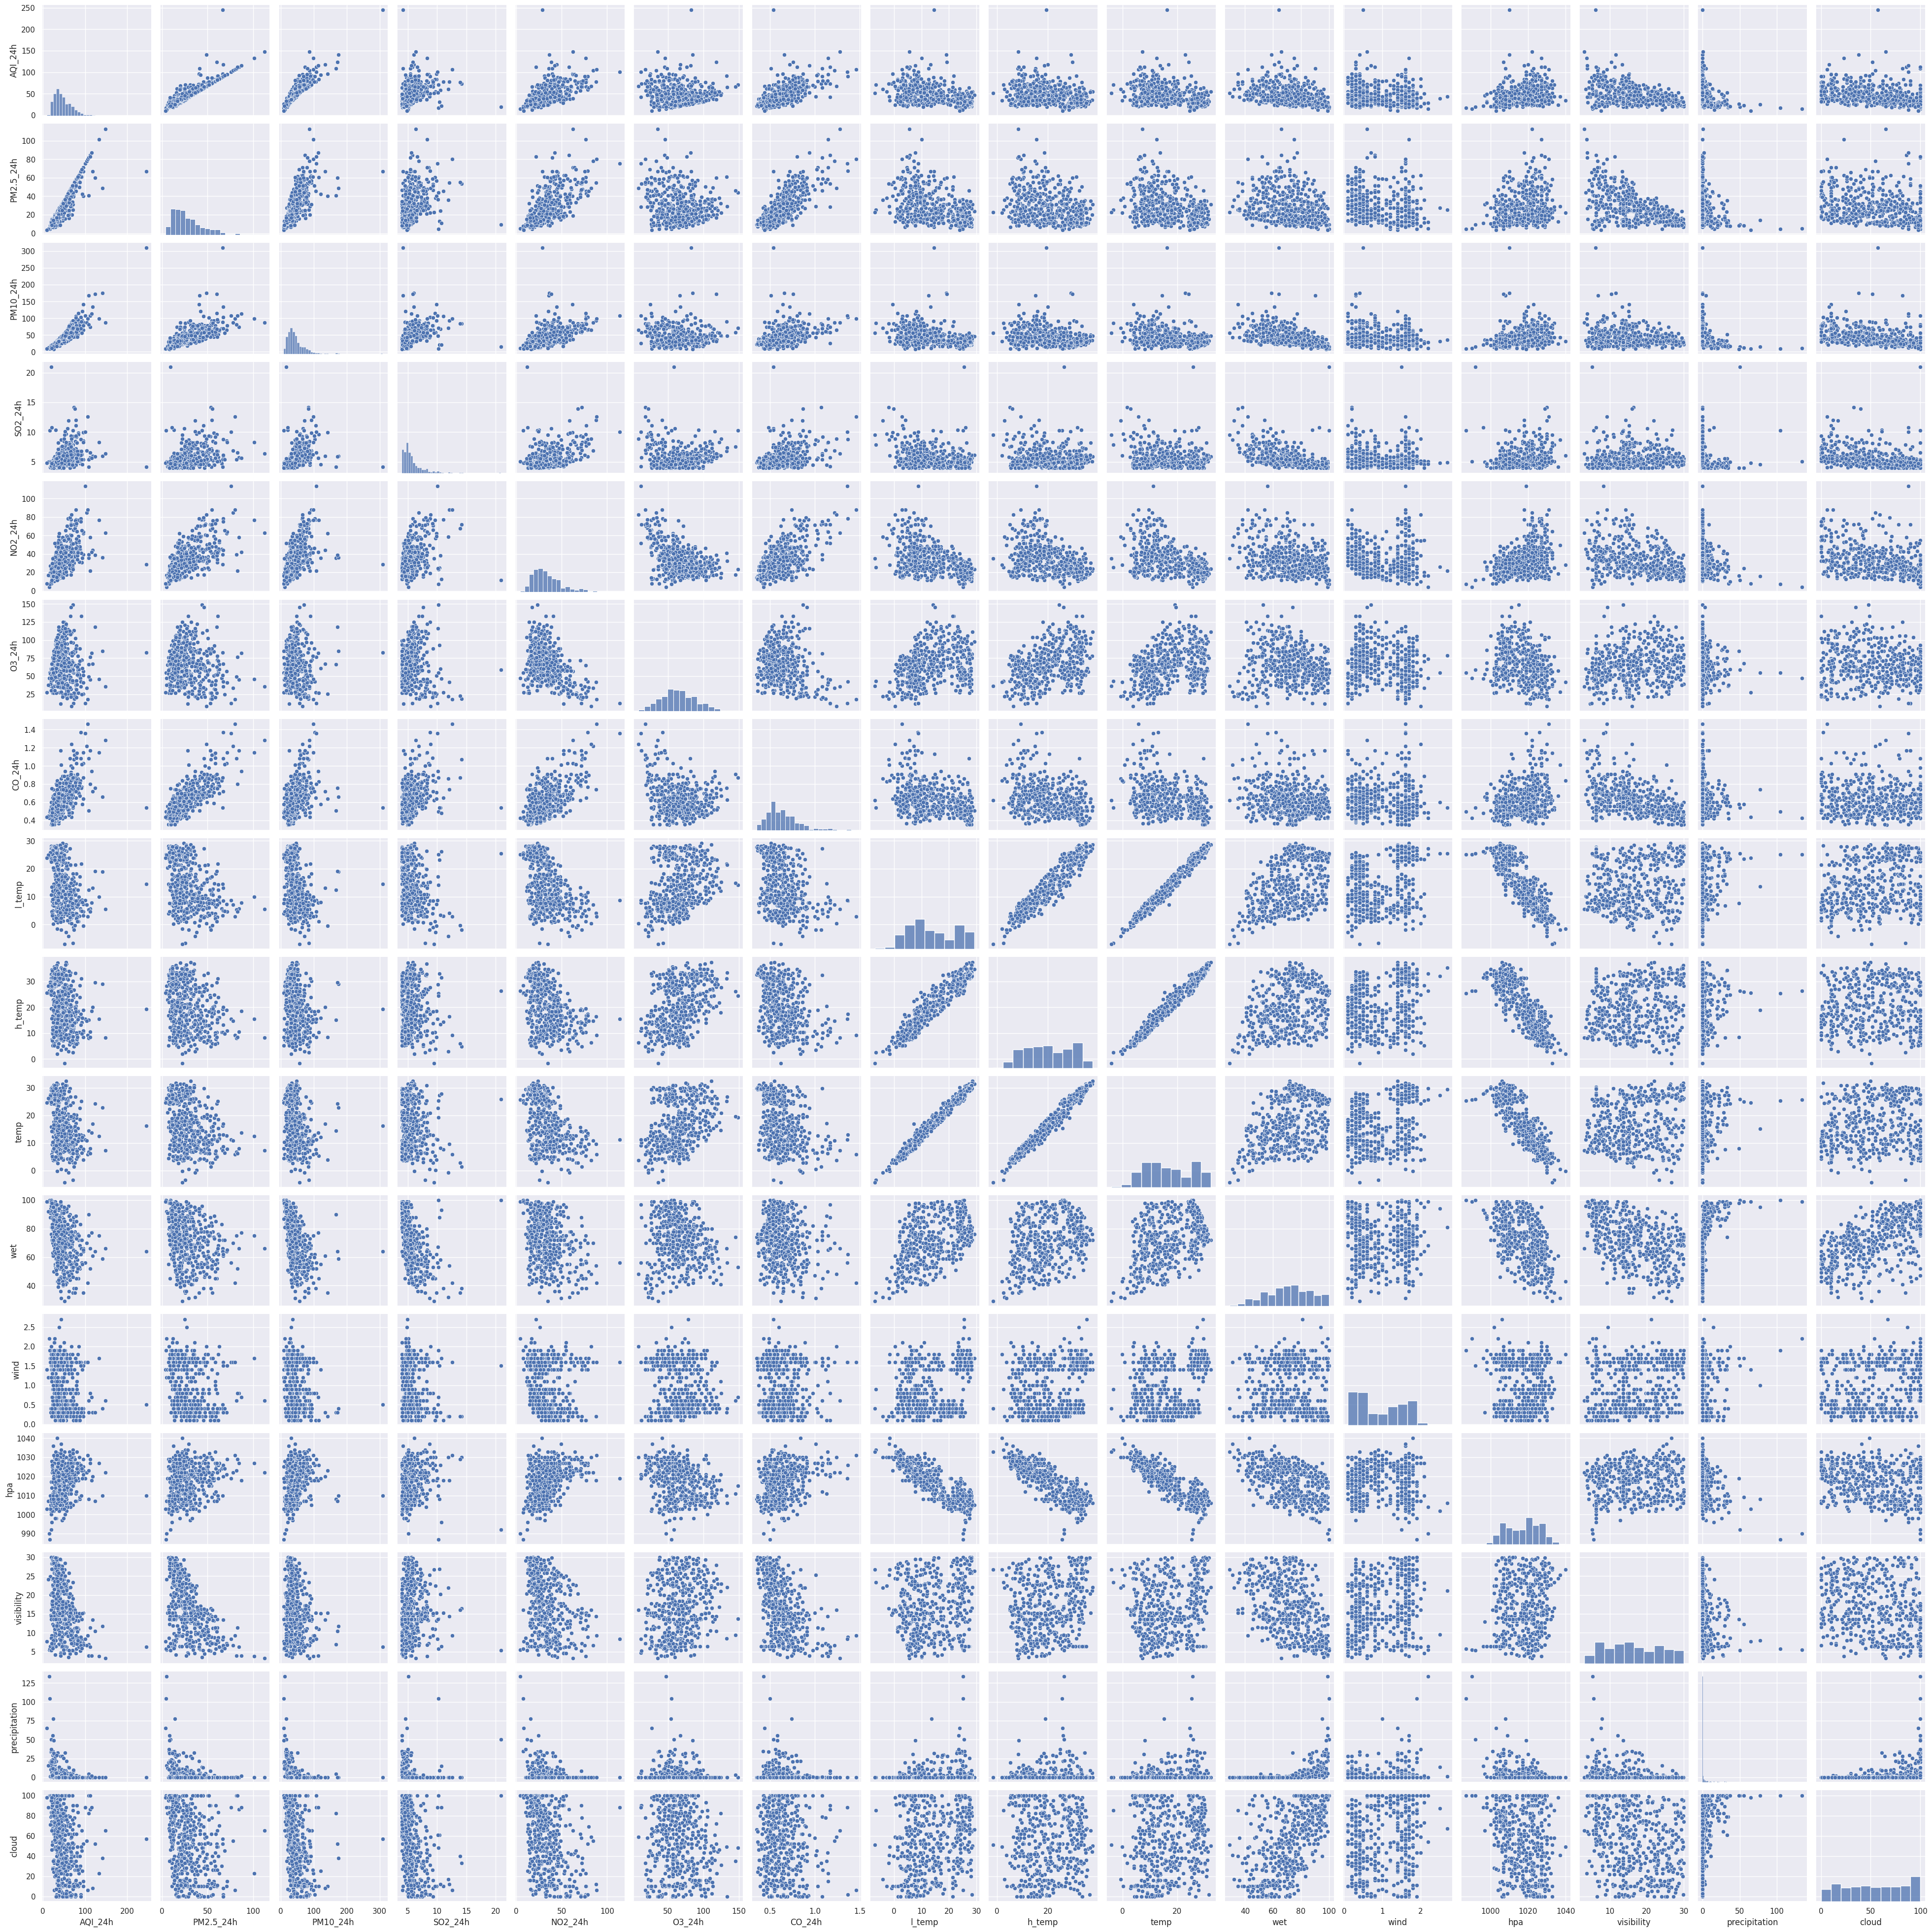

In [ ]:
sns.pairplot(df_shangai)
plt.show()

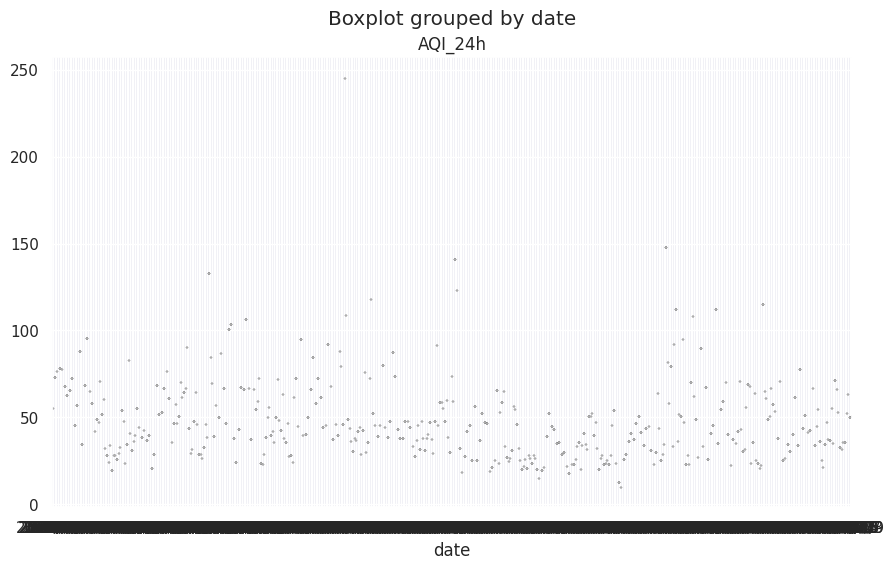

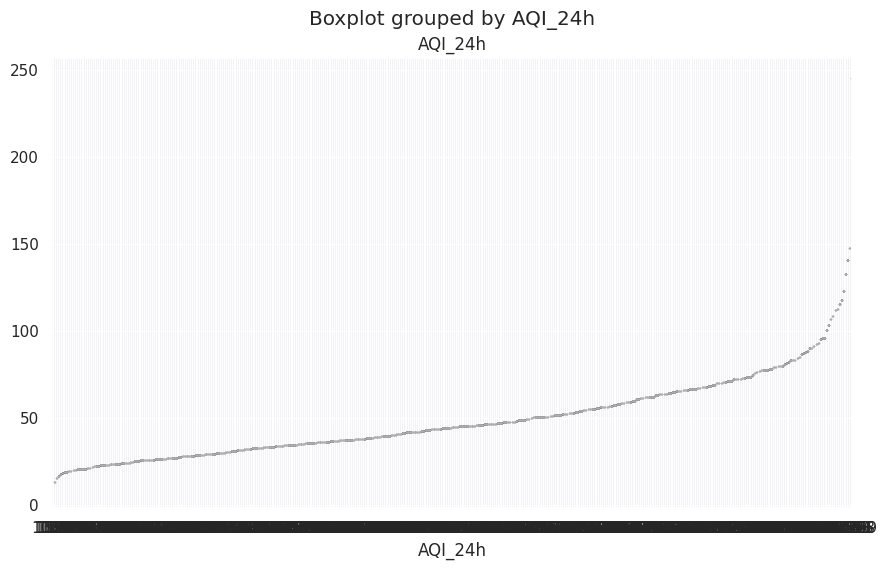

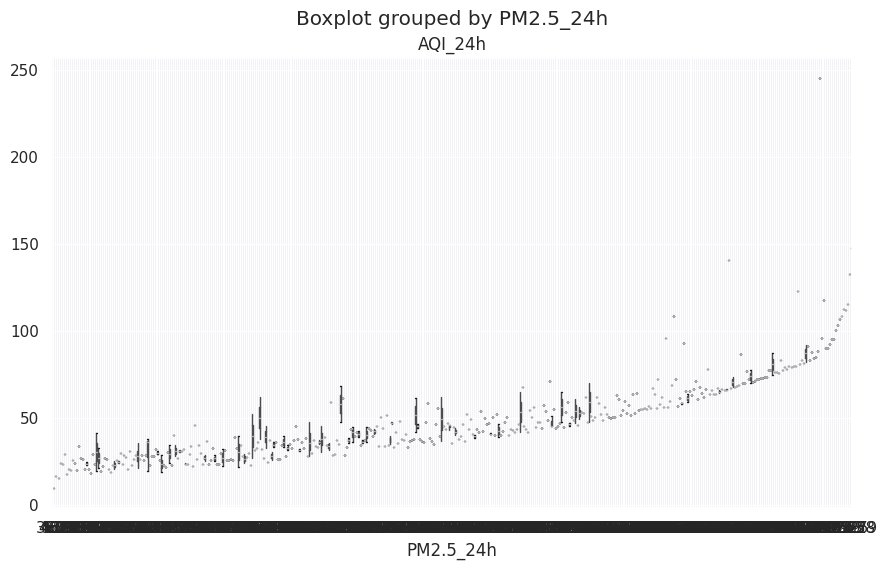

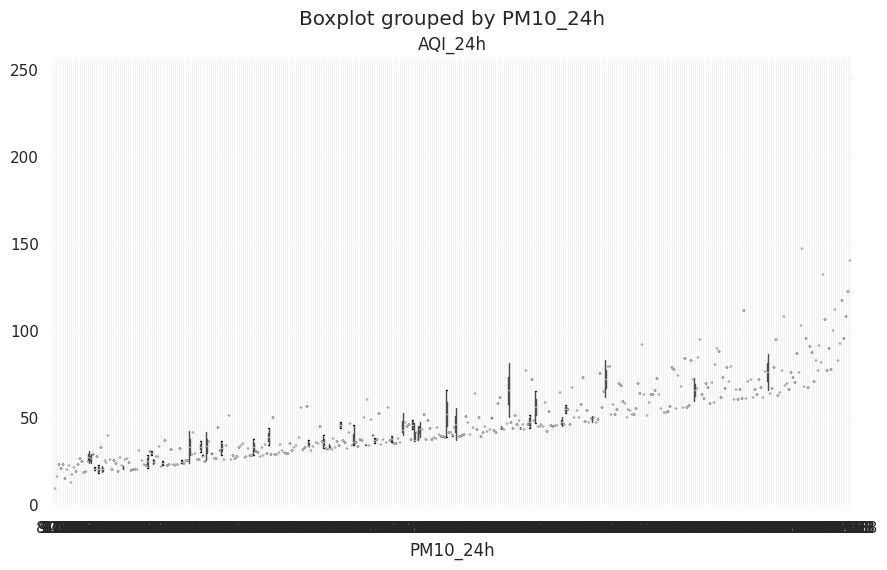

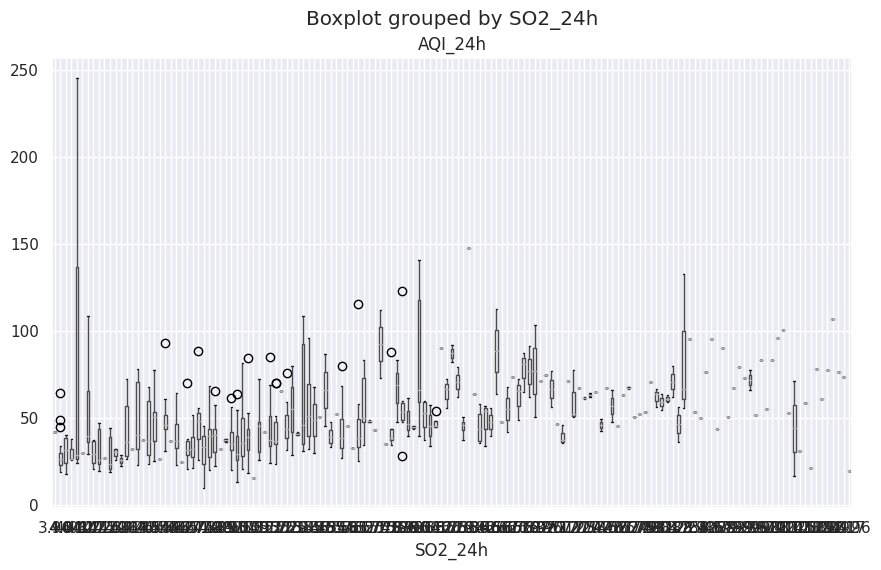

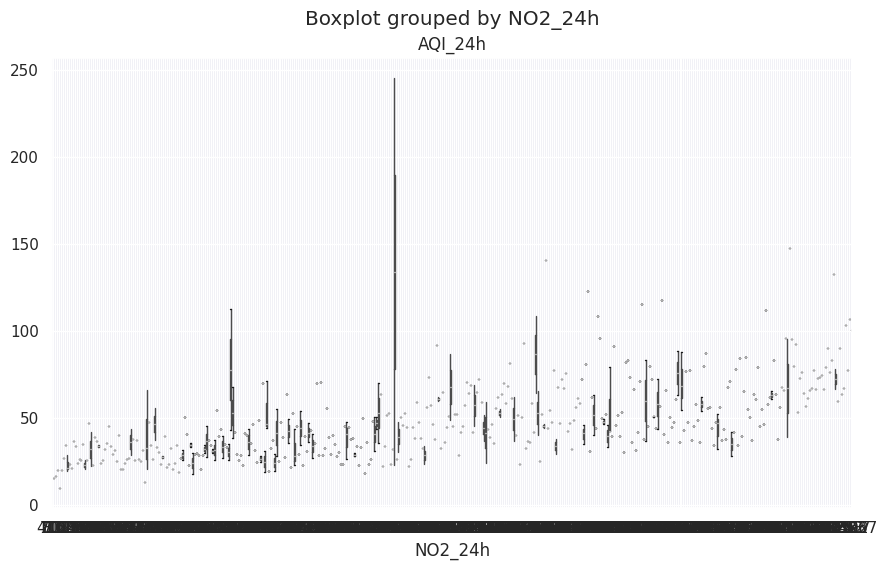

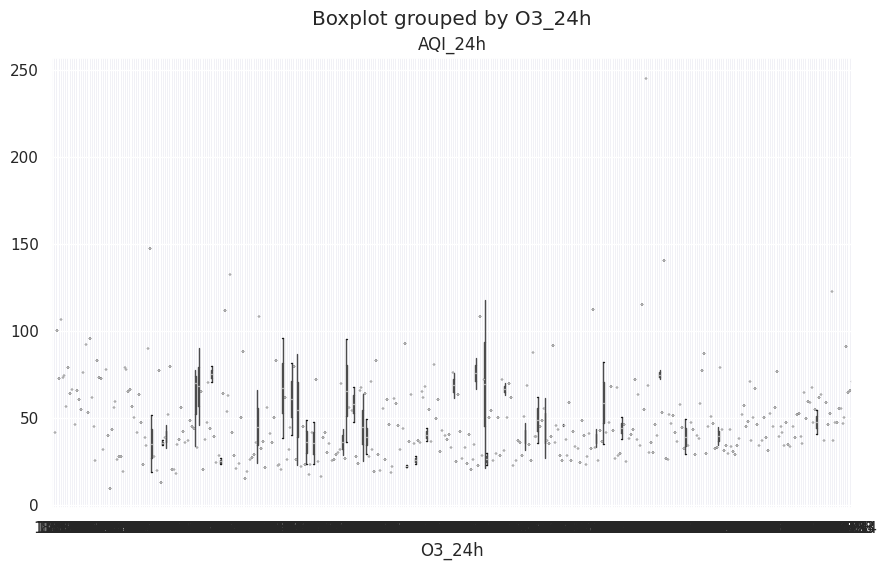

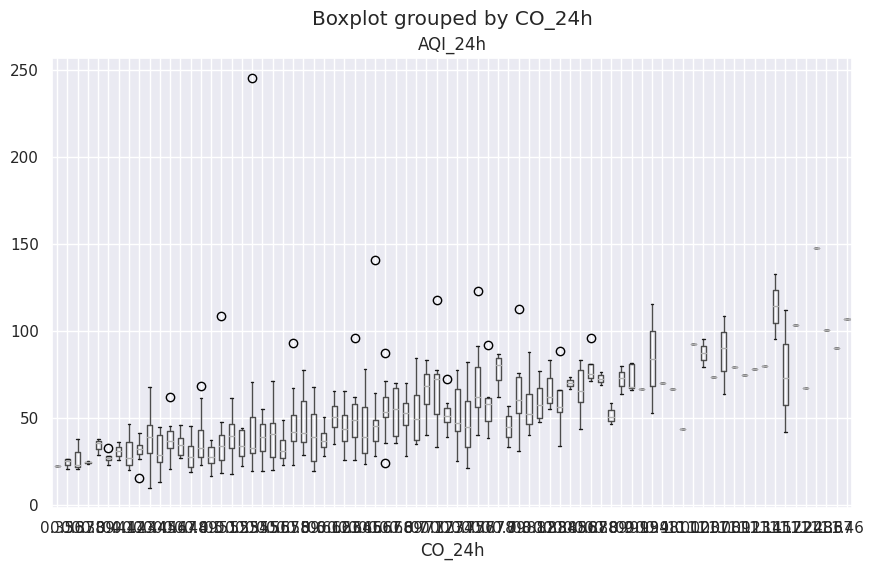

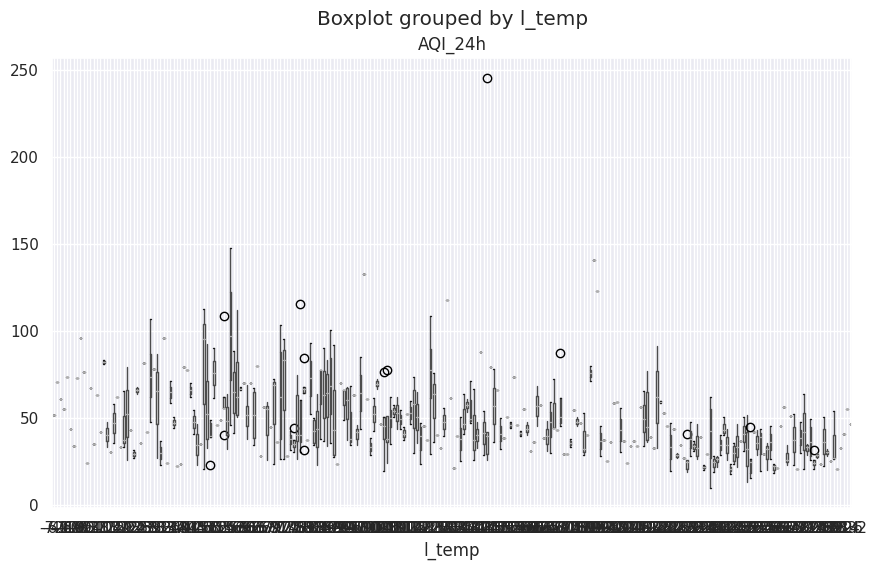

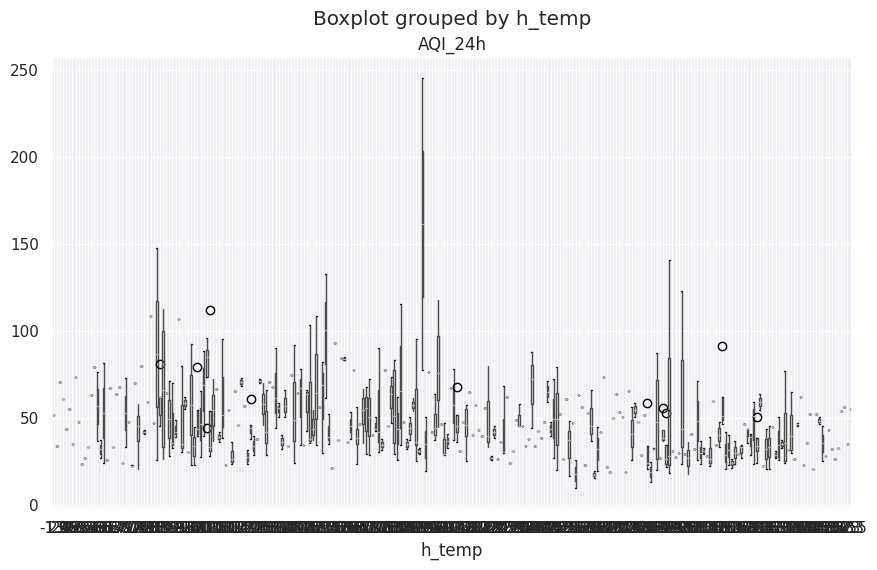

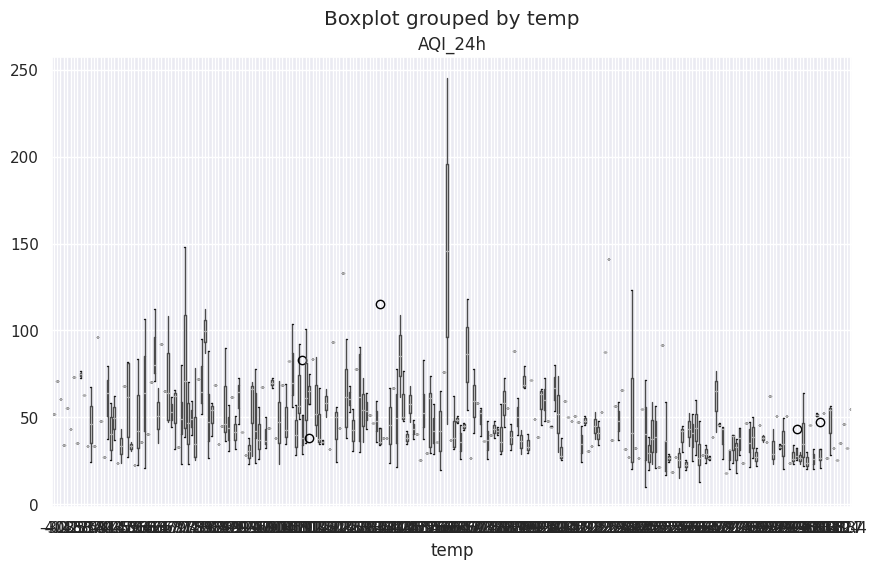

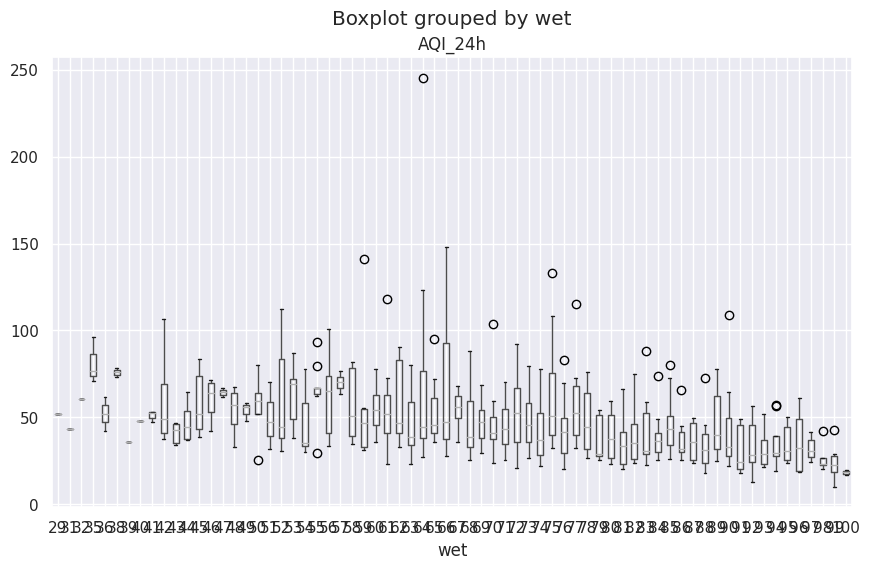

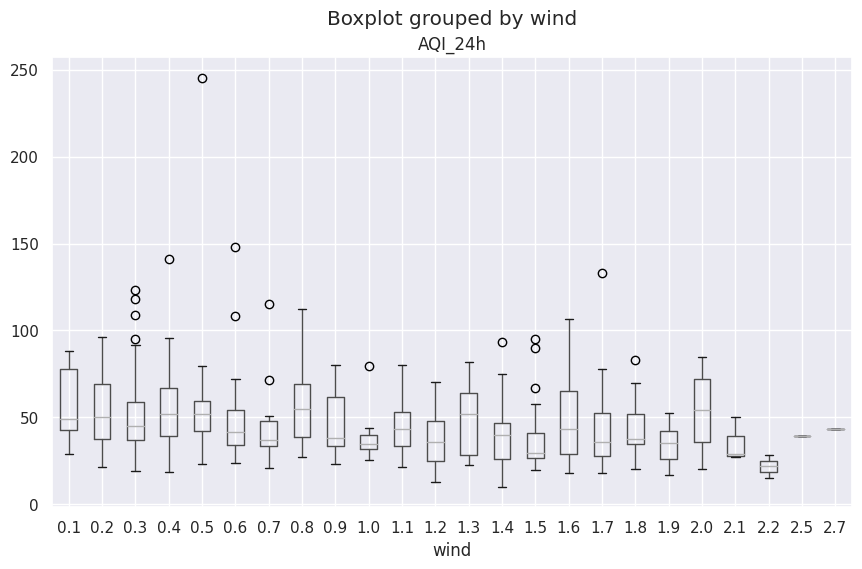

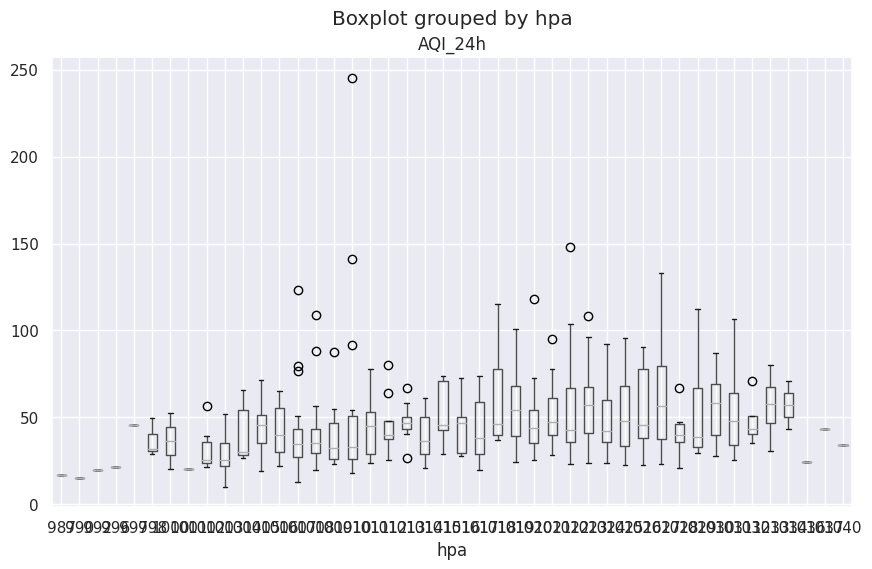

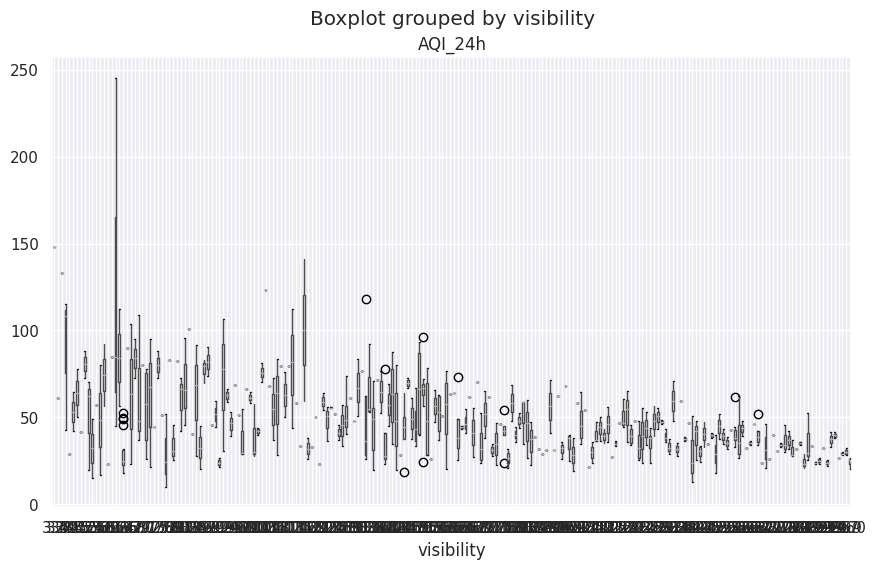

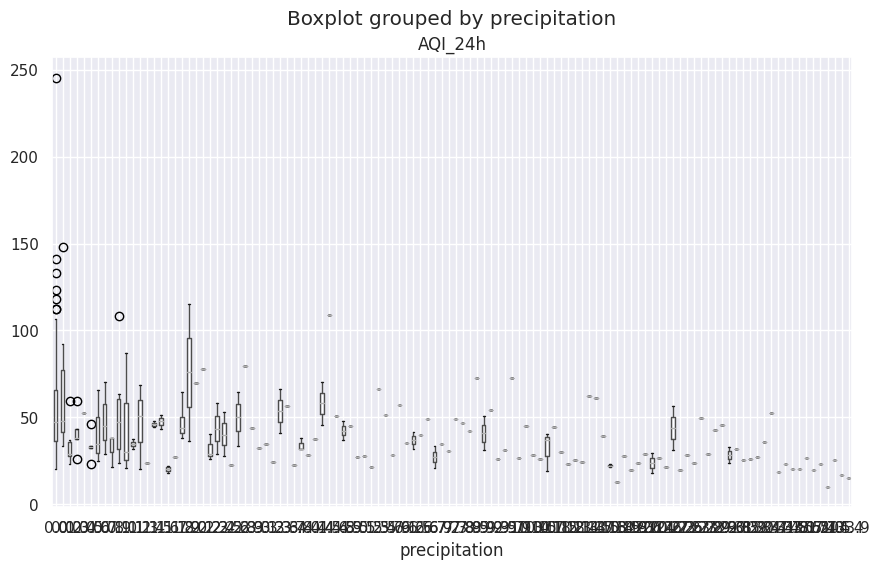

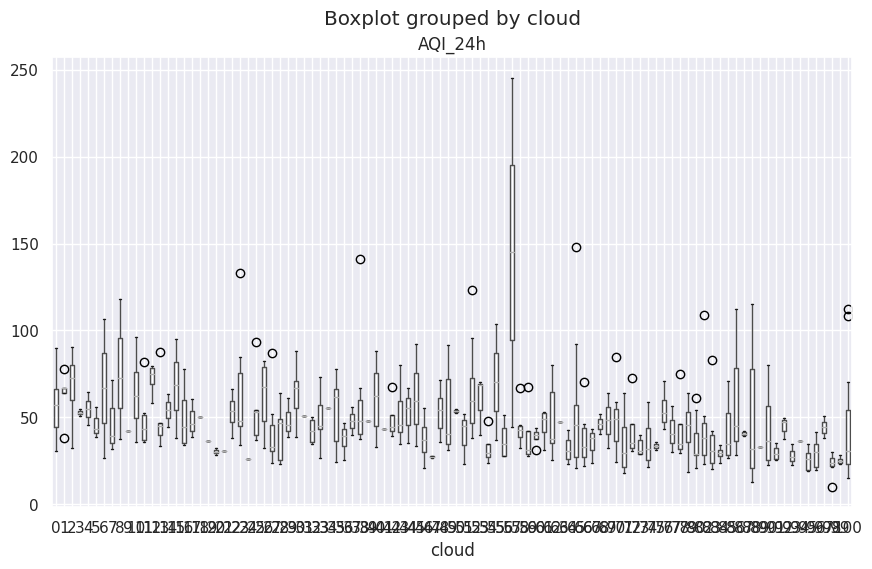

In [ ]:
for i in df_shangai.columns:
   df_shangai.boxplot(column='AQI_24h',by=i,figsize=(10,6))

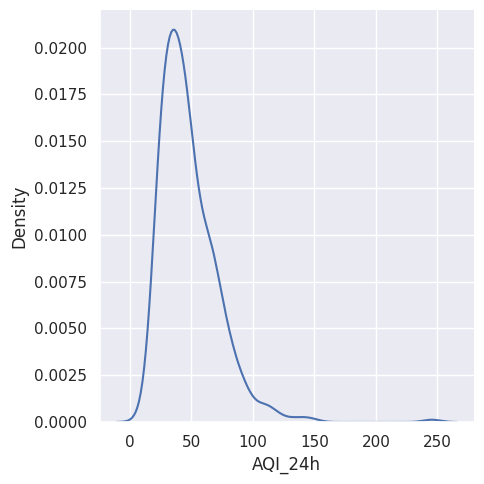

In [ ]:
sns.displot(df_shangai, x="AQI_24h", kind="kde")

In [ ]:
df_shangai.head()

date  AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  CO_24h  \
0  2021/1/1    55.53      37.89     58.21     9.74    57.11   22.37    0.83   
1  2021/1/2    72.88      53.17     64.71     9.29    65.96   26.58    0.90   
2  2021/1/3    65.39      42.30     51.26     5.22    53.52   32.09    0.62   
3  2021/1/4    42.12      20.71     41.88     4.79    51.71   34.17    0.45   
4  2021/1/5    48.92      32.12     45.21     5.71    31.25   53.38    0.54   

   l_temp  h_temp  temp  wet  wind   hpa  visibility  precipitation  cloud  
0    -2.7     3.9   0.1   45   0.1  1030        22.5            0.0     10  
1    -0.9     7.0   2.8   53   0.3  1030        14.7            0.0      8  
2     2.0    10.2   6.6   74   0.3  1030        17.1            0.0     10  
3     7.2    12.9   9.6   75   0.3  1027        17.7            0.0     36  
4     5.0     9.1   7.5   69   0.6  1029        14.9            0.0     76

In [ ]:
df_shangai=df_shangai.drop(['date'],axis=1)
df_shangai

AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  CO_24h  l_temp  \
0      55.53      37.89     58.21     9.74    57.11   22.37    0.83    -2.7   
1      72.88      53.17     64.71     9.29    65.96   26.58    0.90    -0.9   
2      65.39      42.30     51.26     5.22    53.52   32.09    0.62     2.0   
3      42.12      20.71     41.88     4.79    51.71   34.17    0.45     7.2   
4      48.92      32.12     45.21     5.71    31.25   53.38    0.54     5.0   
..       ...        ...       ...      ...      ...     ...     ...     ...   
473    55.62      38.29     55.62     8.25    25.58  122.42    0.81    13.1   
474    71.29      43.71     70.50    10.25    23.42  148.54    0.87    14.1   
475    66.50      45.88     57.25     7.58    17.25  145.33    0.91    14.9   
476    53.08      36.54     47.67    10.12    24.42  116.08    0.94    17.1   
477    33.21      16.96     17.25     5.54    14.96   90.46    0.79    17.6   

     h_temp  temp  wet  wind   hpa  visibility  precipitation  cloud  
0       3.9   0.1   45   0.1  1030        22.5            0.0     10  
1       7.0   2.8   53   0.3  1030        14.7            0.0      8  
2      10.2   6.6   74   0.3  1030        17.1            0.0     10  
3      12.9   9.6   75   0.3  1027        17.7            0.0     36  
4       9.1   7.5   69   0.6  1029        14.9            0.0     76  
..      ...   ...  ...   ...   ...         ...            ...    ...  
473    21.8  17.4   53   0.4  1018        16.8            0.0     46  
474    24.4  19.2   53   0.7  1015        13.7            0.0     48  
475    26.2  19.6   74   0.6  1011         9.4            3.3     35  
476    28.9  22.6   67   0.5  1010        13.5            0.0     61  
477    21.9  19.1   97   0.6  1010        11.9           29.6     89  

[478 rows x 16 columns]

In [ ]:
df_shangai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AQI_24h        478 non-null    float64
 1   PM2.5_24h      478 non-null    float64
 2   PM10_24h       478 non-null    float64
 3   SO2_24h        478 non-null    float64
 4   NO2_24h        478 non-null    float64
 5   O3_24h         478 non-null    float64
 6   CO_24h         478 non-null    float64
 7   l_temp         478 non-null    float64
 8   h_temp         478 non-null    float64
 9   temp           478 non-null    float64
 10  wet            478 non-null    int64  
 11  wind           478 non-null    float64
 12  hpa            478 non-null    int64  
 13  visibility     478 non-null    float64
 14  precipitation  478 non-null    float64
 15  cloud          478 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 59.9 KB


In [ ]:
Y_train=df_shangai["AQI_24h"].values
X_train=df_shangai.drop(["AQI_24h"],axis=1).values

In [ ]:
Y_train

array([ 55.53,  72.88,  65.39,  42.12,  48.92,  47.58,  71.  ,  52.04,
        60.79,  73.46,  76.58,  96.33,  78.29,  77.92,  83.62,  68.12,
        63.17,  83.71,  65.67,  32.48,  45.42,  57.25,  64.38,  88.42,
        34.54,  41.92,  68.83,  95.96,  62.25,  58.58,  37.21,  72.96,
        72.33,  61.79,  72.5 ,  44.83,  83.21,  95.38,  39.75,  23.08,
        23.62,  23.  ,  29.  ,  38.54,  50.5 ,  56.  ,  40.04,  42.04,
        36.04,  50.52,  48.79,  42.92,  63.25,  38.12,  35.92,  46.83,
        27.96,  28.58,  24.38,  40.46,  44.46,  46.33,  49.04,  44.17,
        36.5 ,  30.71,  38.08,  36.88,  50.17,  61.29,  66.12,  84.88,
        77.71,  58.38,  72.71,  68.54,  61.88,  44.38,  45.92,  92.21,
        56.58,  68.12,  37.67,  62.38,  46.5 ,  40.17,  88.08,  79.42,
       245.29, 109.04,  42.08,  78.04,  73.58,  43.58,  38.08,  32.92,
        38.04,  48.  ,  42.13,  44.75,  29.  ,  42.75,  75.96,  30.  ,
        36.08,  72.46, 118.21,  52.42,  45.71,  39.62,  45.58,  45.25,
      

In [ ]:
X_train

array([[37.89, 58.21,  9.74, ..., 22.5 ,  0.  , 10.  ],
       [53.17, 64.71,  9.29, ..., 14.7 ,  0.  ,  8.  ],
       [42.3 , 51.26,  5.22, ..., 17.1 ,  0.  , 10.  ],
       ...,
       [45.88, 57.25,  7.58, ...,  9.4 ,  3.3 , 35.  ],
       [36.54, 47.67, 10.12, ..., 13.5 ,  0.  , 61.  ],
       [16.96, 17.25,  5.54, ..., 11.9 , 29.6 , 89.  ]])

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [ ]:
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [ ]:
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

In [ ]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

In [ ]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [ ]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [ ]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data   

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 3.723040020826907
Iteration: 2
Best (PSO): 3.6846450576679524
Iteration: 3
Best (PSO): 3.678354488144907
Iteration: 4
Best (PSO): 3.657695401517679
Iteration: 5
Best (PSO): 3.6414274406375093
Iteration: 6
Best (PSO): 3.6414274406375093
Iteration: 7
Best (PSO): 3.6414274406375093
Iteration: 8
Best (PSO): 3.6414274406375093
Iteration: 9
Best (PSO): 3.6414274406375093
Iteration: 10
Best (PSO): 3.6414274406375093
Iteration: 11
Best (PSO): 3.6414274406375093
Iteration: 12
Best (PSO): 3.6414274406375093
Iteration: 13
Best (PSO): 3.6278585675399238
Iteration: 14
Best (PSO): 3.6278585675399238
Iteration: 15
Best (PSO): 3.6278585675399238
Iteration: 16
Best (PSO): 3.6278585675399238
Iteration: 17
Best (PSO): 3.6278585675399238
Iteration: 18
Best (PSO): 3.6278585675399238
Iteration: 19
Best (PSO): 3.6278585675399238
Iteration: 20
Best (PSO): 3.6278585675399238
Iteration: 21
Best (PSO): 3.6278585675399238
Iteration: 22
Best (PSO): 3.6278585675399238
Iteration: 23
Best (PS

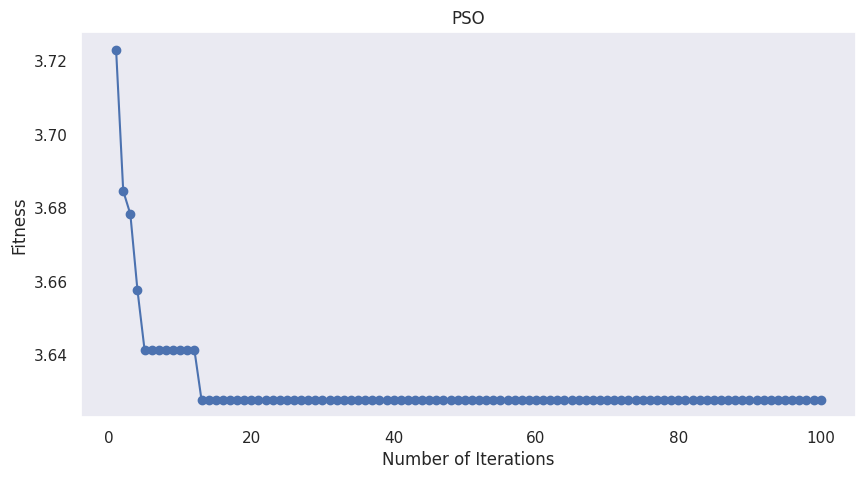

In [ ]:
fmdl  = jfs(X_train, Y_train, opts)
sf    = fmdl['sf']
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = LinearRegression()
mdl.fit(x_train, y_train)
y_pred    = mdl.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0
fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [ ]:
fmdl['sf']

array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14])

In [ ]:
df_shangai

AQI_24h  PM2.5_24h  PM10_24h  SO2_24h  NO2_24h  O3_24h  CO_24h  l_temp  \
0      55.53      37.89     58.21     9.74    57.11   22.37    0.83    -2.7   
1      72.88      53.17     64.71     9.29    65.96   26.58    0.90    -0.9   
2      65.39      42.30     51.26     5.22    53.52   32.09    0.62     2.0   
3      42.12      20.71     41.88     4.79    51.71   34.17    0.45     7.2   
4      48.92      32.12     45.21     5.71    31.25   53.38    0.54     5.0   
..       ...        ...       ...      ...      ...     ...     ...     ...   
473    55.62      38.29     55.62     8.25    25.58  122.42    0.81    13.1   
474    71.29      43.71     70.50    10.25    23.42  148.54    0.87    14.1   
475    66.50      45.88     57.25     7.58    17.25  145.33    0.91    14.9   
476    53.08      36.54     47.67    10.12    24.42  116.08    0.94    17.1   
477    33.21      16.96     17.25     5.54    14.96   90.46    0.79    17.6   

     h_temp  temp  wet  wind   hpa  visibility  precipitation  cloud  
0       3.9   0.1   45   0.1  1030        22.5            0.0     10  
1       7.0   2.8   53   0.3  1030        14.7            0.0      8  
2      10.2   6.6   74   0.3  1030        17.1            0.0     10  
3      12.9   9.6   75   0.3  1027        17.7            0.0     36  
4       9.1   7.5   69   0.6  1029        14.9            0.0     76  
..      ...   ...  ...   ...   ...         ...            ...    ...  
473    21.8  17.4   53   0.4  1018        16.8            0.0     46  
474    24.4  19.2   53   0.7  1015        13.7            0.0     48  
475    26.2  19.6   74   0.6  1011         9.4            3.3     35  
476    28.9  22.6   67   0.5  1010        13.5            0.0     61  
477    21.9  19.1   97   0.6  1010        11.9           29.6     89  

[478 rows x 16 columns]

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
total_dataset = len(df_shangai)
df_train = df_shangai[:int(total_dataset*0.76)]
df_test = df_shangai[int(total_dataset*0.76):total_dataset]

# scaled
scaler = MinMaxScaler()
df_shangai_train_scaled = scaler.fit_transform(df_train)
df_shangai_test_scaled = scaler.fit_transform(df_test)

print('Data for train:', df_train.shape)
print('\nData for test:', df_test.shape)

print(df_shangai_train_scaled)
print(df_shangai_test_scaled)

Data for train: (363, 16)

Data for test: (115, 16)
[[0.19292276 0.350818   0.16344236 ... 0.71698113 0.         0.1       ]
 [0.26671487 0.50705521 0.18504853 ... 0.42264151 0.         0.08      ]
 [0.2348588  0.39591002 0.14034038 ... 0.51320755 0.         0.1       ]
 ...
 [0.14192753 0.26206544 0.11371493 ... 0.82264151 0.         0.41      ]
 [0.24383294 0.46359918 0.18740859 ... 0.47169811 0.         0.59      ]
 [0.29584893 0.56339468 0.23195054 ... 0.28679245 0.         0.26      ]]
[[0.68025885 0.69407988 0.79710273 ... 0.23193916 0.         0.06      ]
 [0.47208795 0.48626192 0.5490681  ... 0.42585551 0.         0.43      ]
 [0.11765165 0.098291   0.22895504 ... 0.81749049 0.         0.96      ]
 ...
 [0.36550756 0.36823718 0.430969   ... 0.23574144 0.04258065 0.35      ]
 [0.26087634 0.2800491  0.3463475  ... 0.39163498 0.         0.61      ]
 [0.10595665 0.09517515 0.07764332 ... 0.33079848 0.38193548 0.89      ]]


In [ ]:
n_steps_in, n_steps_out = 8, 2

# Convert into input/output
x_train, y_train = split_sequences(df_shangai_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_shangai_test_scaled, n_steps_in, n_steps_out)
n_features = x_train.shape[2]
# The dataset knows the number of features, e.g. 2
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train)

(354, 8, 16)
(106, 8, 16)
(354, 2, 16)
(106, 2, 16)
[[[0.19292276 0.350818   0.16344236 ... 0.71698113 0.         0.1       ]
  [0.26671487 0.50705521 0.18504853 ... 0.42264151 0.         0.08      ]
  [0.2348588  0.39591002 0.14034038 ... 0.51320755 0.         0.1       ]
  ...
  [0.15911024 0.28507157 0.12618003 ... 0.47169811 0.         0.92      ]
  [0.25871895 0.22300613 0.25349023 ... 0.74716981 0.         0.85      ]
  [0.17807928 0.19304703 0.15815716 ... 0.8754717  0.         0.51      ]]

 [[0.26671487 0.50705521 0.18504853 ... 0.42264151 0.         0.08      ]
  [0.2348588  0.39591002 0.14034038 ... 0.51320755 0.         0.1       ]
  [0.13588806 0.17515337 0.10916102 ... 0.53584906 0.         0.36      ]
  ...
  [0.25871895 0.22300613 0.25349023 ... 0.74716981 0.         0.85      ]
  [0.17807928 0.19304703 0.15815716 ... 0.8754717  0.         0.51      ]
  [0.21529432 0.33190184 0.20678766 ... 0.69433962 0.         0.17      ]]

 [[0.2348588  0.39591002 0.14034038 ... 0.51

In [ ]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))


In [ ]:
epoch = 50

model.compile(optimizer='adam', loss='mse', 
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

Epoch 1/50
12/12 [==============================] - 3s 65ms/step - loss: 0.1525 - mean_absolute_error: 0.3005 - val_loss: 0.0651 - val_mean_absolute_error: 0.1956
Epoch 2/50
12/12 [==============================] - 0s 41ms/step - loss: 0.0578 - mean_absolute_error: 0.1810 - val_loss: 0.0803 - val_mean_absolute_error: 0.2182
Epoch 3/50
12/12 [==============================] - 1s 44ms/step - loss: 0.0474 - mean_absolute_error: 0.1638 - val_loss: 0.0619 - val_mean_absolute_error: 0.1872
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.0391 - mean_absolute_error: 0.1502 - val_loss: 0.0568 - val_mean_absolute_error: 0.1815
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.1338 - val_loss: 0.0515 - val_mean_absolute_error: 0.1732
Epoch 6/50
12/12 [==============================] - 0s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.1192 - val_loss: 0.0503 - val_mean_absolute_error: 0.1709
Epoch 7/50
12/12 [====

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 200)               173600    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 2, 200)           0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 2, 200)            320800    
                                                                 
 time_distributed_5 (TimeDis  (None, 2, 16)            3216      
 tributed)                                                       
                                                                 
Total params: 497,616
Trainable params: 497,616
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model.predict_generator(x_test)
print(predictions.shape)
print(y_test.shape)

<ipython-input-258-cb2bd3e4ae3a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(x_test)


(103, 1, 16)
(103, 1, 16)


In [ ]:
predictions

array([[[ 0.31425726,  0.6258263 ,  0.21629423, ...,  0.15262306,
         -0.02911412,  0.43151334]],

       [[ 0.19917275,  0.35896936,  0.13892116, ...,  0.478125  ,
         -0.02514866,  0.34997112]],

       [[ 0.20235915,  0.39914912,  0.14470235, ...,  0.3011854 ,
         -0.01567797,  0.49039638]],

       ...,

       [[ 0.17875181,  0.23262772,  0.20387614, ...,  0.7696689 ,
         -0.02081533,  0.31202513]],

       [[ 0.18820256,  0.24346608,  0.19701293, ...,  0.64336854,
          0.00347047,  0.39402726]],

       [[ 0.18462072,  0.24311131,  0.19018303, ...,  0.63483137,
          0.00666107,  0.41032594]]], dtype=float32)

In [ ]:
predictions = np.reshape(predictions, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
real = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))

# rescale predictions
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real = pd.DataFrame(real)
real = scaler.inverse_transform(real)
real = pd.DataFrame(real)

print(predictions.shape)
print(real.shape)

(103, 16)
(103, 16)


In [ ]:
predictions

0          1          2         3          4           5   \
0    59.926636  73.161263  32.946667  6.365371  67.088638   35.908592   
1    45.165897  44.898445  24.187265  5.933589  55.225384   38.836185   
2    45.574585  49.153881  24.841753  5.702662  52.195850   38.993496   
3    47.990540  52.830090  26.289757  6.101925  55.377460   35.415649   
4    40.277737  41.360237  21.655777  5.996758  48.296791   33.958260   
..         ...        ...        ...       ...        ...         ...   
98   33.348808  24.817663  21.902601  5.084976  29.653185   99.351013   
99   38.679489  30.006855  26.822865  5.307930  31.835398  110.287674   
100  42.546707  31.517601  31.540815  5.637537  33.629204  123.231590   
101  43.758858  32.665493  30.763832  5.353681  32.321995  121.617607   
102  43.299454  32.627918  29.990622  5.265904  32.024296  120.045158   

           6          7          8          9          10        11  \
0    1.187093   8.389172  16.789242  11.946687  68.128342  1.171704   
1    0.935406   6.539429  15.273709  10.678546  58.798203  1.118062   
2    0.937574   6.904332  14.255736  10.428253  65.065430  1.073582   
3    1.008296   6.215479  13.788106   9.854149  62.806984  1.065623   
4    0.914362   4.646698  11.312274   7.965273  57.700050  1.012459   
..        ...        ...        ...        ...        ...       ...   
98   0.651288  12.081871  22.997723  17.252172  56.133942  0.822968   
99   0.683040  12.799916  24.269131  18.148563  56.031326  0.831650   
100  0.697091  13.719831  26.380936  19.447067  55.897964  0.846953   
101  0.730345  14.209204  26.494722  19.632801  61.831318  0.795808   
102  0.740372  14.652797  27.029900  20.283998  63.650455  0.771290   

              12         13        14         15  
0    1023.338440   7.213987 -2.256344  43.151333  
1    1023.656189  15.774688 -1.949021  34.997112  
2    1023.086121  11.121177 -1.215042  49.039639  
3    1023.775757  11.501183 -1.134375  49.369984  
4    1024.957520  14.851201 -0.229693  47.703987  
..           ...        ...       ...        ...  
98   1020.180786  22.455160 -1.691432  33.485554  
99   1019.672913  21.425831 -1.626349  31.917423  
100  1019.943909  23.442291 -1.613188  31.202513  
101  1017.860474  20.120592  0.268961  39.402725  
102  1017.026489  19.896065  0.516233  41.032593  

[103 rows x 16 columns]

In [ ]:
real

0      1      2      3      4       5     6     7     8     9     10  \
0    81.75  60.62  43.83   5.04  34.08   51.71  0.91   2.7   6.1   4.9  58.0   
1    58.46  41.75  49.04   5.62  58.42   37.33  0.86   1.5   7.6   4.3  49.0   
2    79.50  58.71  58.83   5.67  56.38   31.83  1.03   2.2   5.8   4.2  55.0   
3    33.33  20.12  30.58   4.88  40.42   42.17  0.72   1.3   7.0   4.3  56.0   
4    92.38  68.75  56.08   5.38  65.58   24.75  1.02   4.8   9.7   6.5  72.0   
..     ...    ...    ...    ...    ...     ...   ...   ...   ...   ...   ...   
98   55.62  38.29  55.62   8.25  25.58  122.42  0.81  13.1  21.8  17.4  53.0   
99   71.29  43.71  70.50  10.25  23.42  148.54  0.87  14.1  24.4  19.2  53.0   
100  66.50  45.88  57.25   7.58  17.25  145.33  0.91  14.9  26.2  19.6  74.0   
101  53.08  36.54  47.67  10.12  24.42  116.08  0.94  17.1  28.9  22.6  67.0   
102  33.21  16.96  17.25   5.54  14.96   90.46  0.79  17.6  21.9  19.1  97.0   

      11      12    13    14    15  
0    1.3  1027.0  11.4   0.0  11.0  
1    0.5  1025.0  11.5   0.0   0.0  
2    1.0  1027.0  11.3   0.0  30.0  
3    0.9  1026.0  24.4   0.1  46.0  
4    0.4  1024.0   5.8   0.1  45.0  
..   ...     ...   ...   ...   ...  
98   0.4  1018.0  16.8   0.0  46.0  
99   0.7  1015.0  13.7   0.0  48.0  
100  0.6  1011.0   9.4   3.3  35.0  
101  0.5  1010.0  13.5   0.0  61.0  
102  0.6  1010.0  11.9  29.6  89.0  

[103 rows x 16 columns]

In [ ]:
df_final = pd.DataFrame()

In [ ]:
df_final['aqi_24h'] = real[0]
df_final['pm10_24h'] = real[1]
df_final['pm25_24h'] = real[2]
df_final['o3_24h'] = real[3]
df_final['so2_24h'] = real[4]
df_final['no2_24h'] = real[5]
df_final['co_24h'] = real[6]

df_final['aqi_24h_pred'] = predictions[0]
df_final['pm10_24h_pred'] = predictions[1]
df_final['pm25_24h_pred'] = predictions[2]
df_final['o3_24h_pred'] = predictions[3]
df_final['so2_24h_pred'] = predictions[4]
df_final['no2_24h_pred'] = predictions[5]
df_final['co_24h_pred'] = predictions[6]

In [ ]:
df_final

aqi_24h  pm10_24h  pm25_24h  o3_24h  so2_24h  no2_24h  co_24h  \
0      81.75     60.62     43.83    5.04    34.08    51.71    0.91   
1      58.46     41.75     49.04    5.62    58.42    37.33    0.86   
2      79.50     58.71     58.83    5.67    56.38    31.83    1.03   
3      33.33     20.12     30.58    4.88    40.42    42.17    0.72   
4      92.38     68.75     56.08    5.38    65.58    24.75    1.02   
..       ...       ...       ...     ...      ...      ...     ...   
98     55.62     38.29     55.62    8.25    25.58   122.42    0.81   
99     71.29     43.71     70.50   10.25    23.42   148.54    0.87   
100    66.50     45.88     57.25    7.58    17.25   145.33    0.91   
101    53.08     36.54     47.67   10.12    24.42   116.08    0.94   
102    33.21     16.96     17.25    5.54    14.96    90.46    0.79   

     aqi_24h_pred  pm10_24h_pred  pm25_24h_pred  o3_24h_pred  so2_24h_pred  \
0       59.926636      73.161263      32.946667     6.365371     67.088638   
1       45.165897      44.898445      24.187265     5.933589     55.225384   
2       45.574585      49.153881      24.841753     5.702662     52.195850   
3       47.990540      52.830090      26.289757     6.101925     55.377460   
4       40.277737      41.360237      21.655777     5.996758     48.296791   
..            ...            ...            ...          ...           ...   
98      33.348808      24.817663      21.902601     5.084976     29.653185   
99      38.679489      30.006855      26.822865     5.307930     31.835398   
100     42.546707      31.517601      31.540815     5.637537     33.629204   
101     43.758858      32.665493      30.763832     5.353681     32.321995   
102     43.299454      32.627918      29.990622     5.265904     32.024296   

     no2_24h_pred  co_24h_pred  
0       35.908592     1.187093  
1       38.836185     0.935406  
2       38.993496     0.937574  
3       35.415649     1.008296  
4       33.958260     0.914362  
..            ...          ...  
98      99.351013     0.651288  
99     110.287674     0.683040  
100    123.231590     0.697091  
101    121.617607     0.730345  
102    120.045158     0.740372  

[103 rows x 14 columns]

<Axes: >

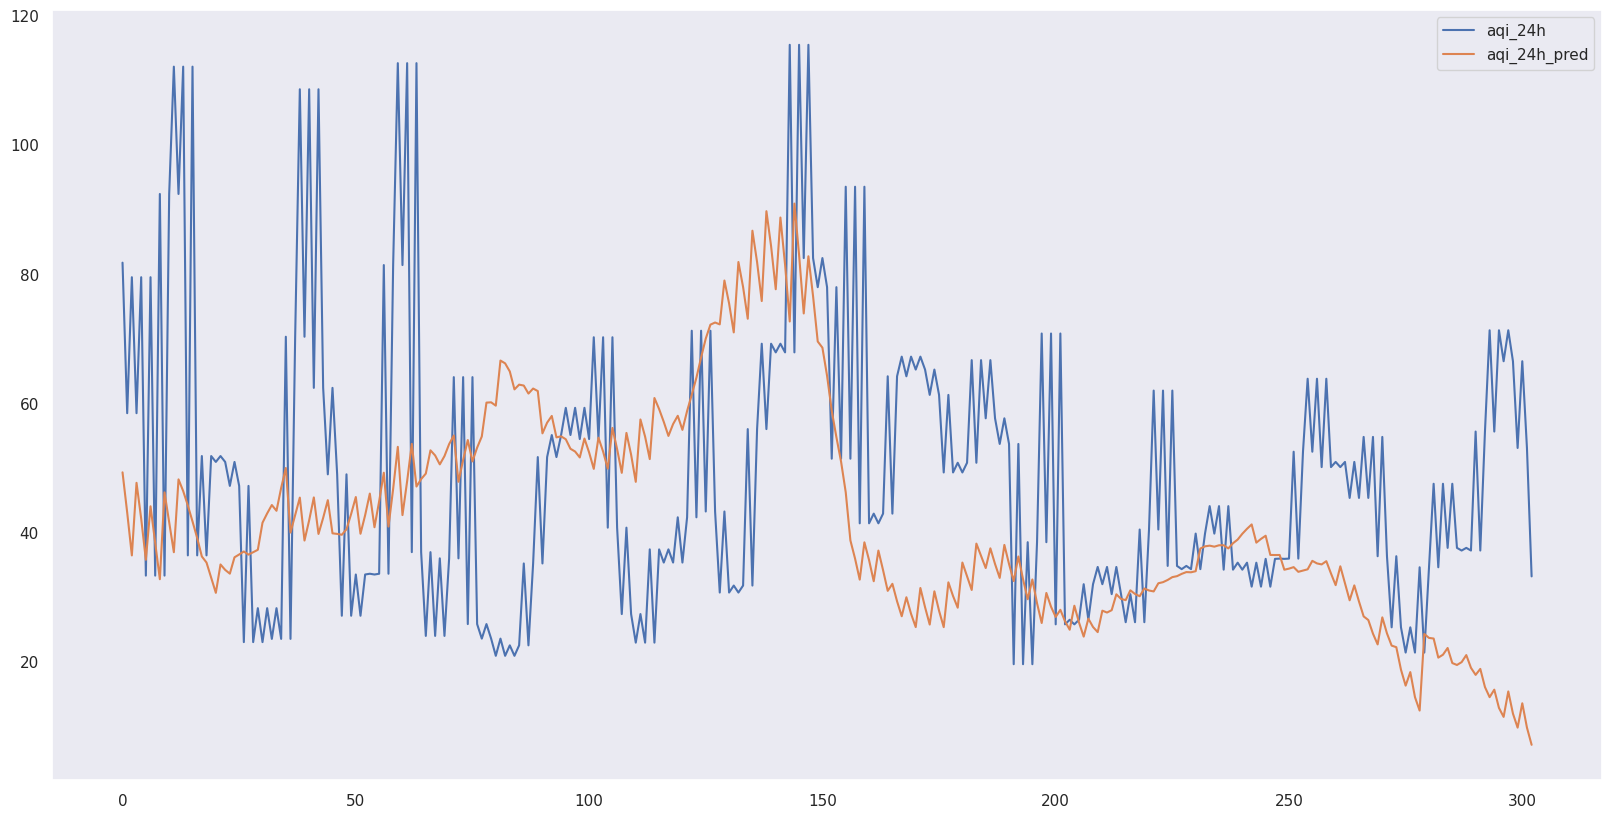

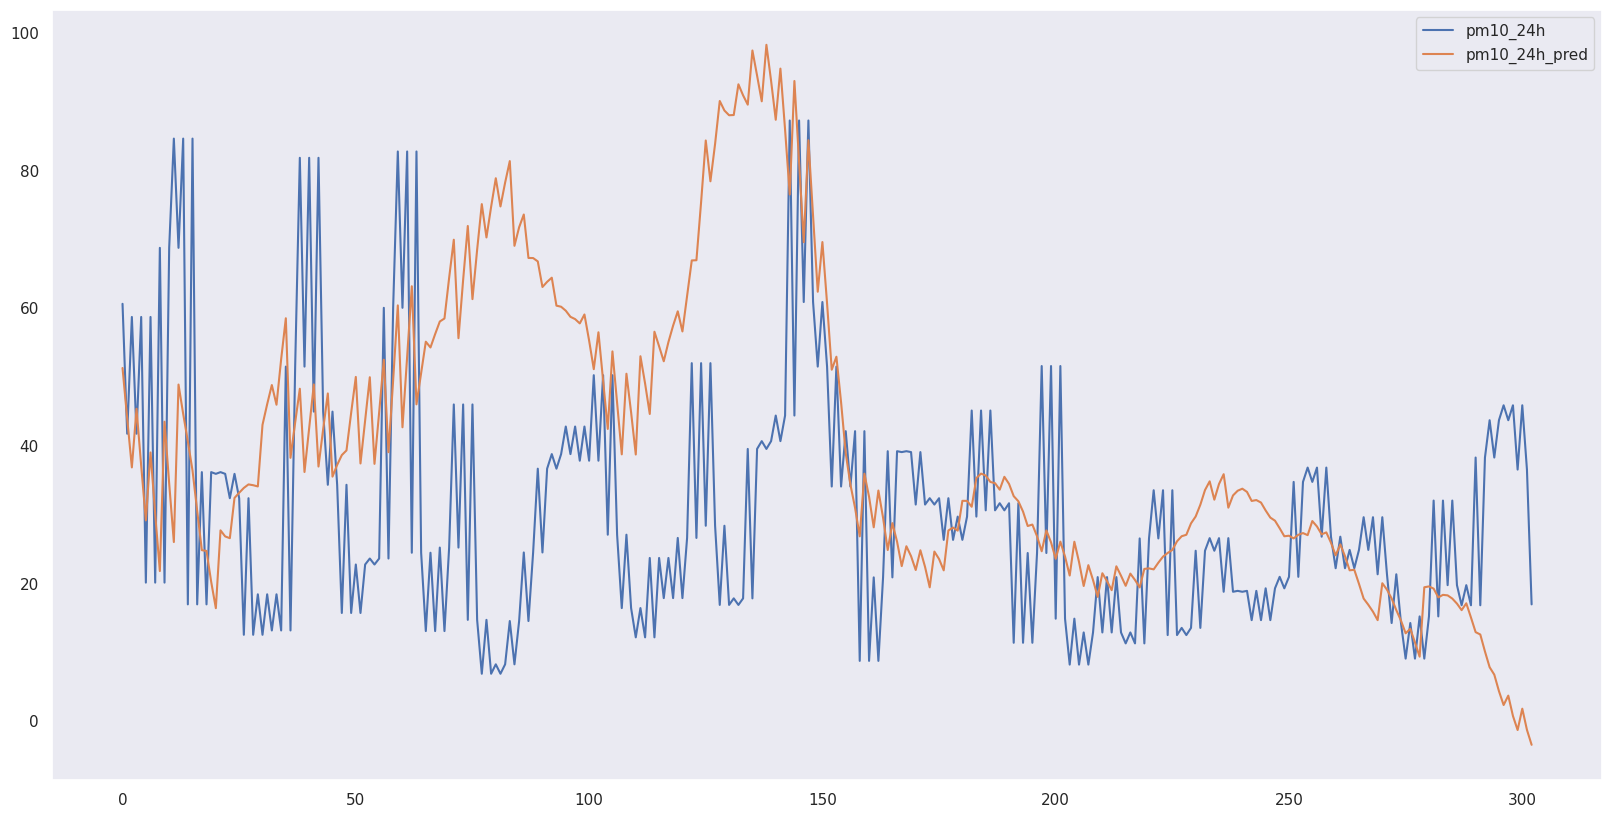

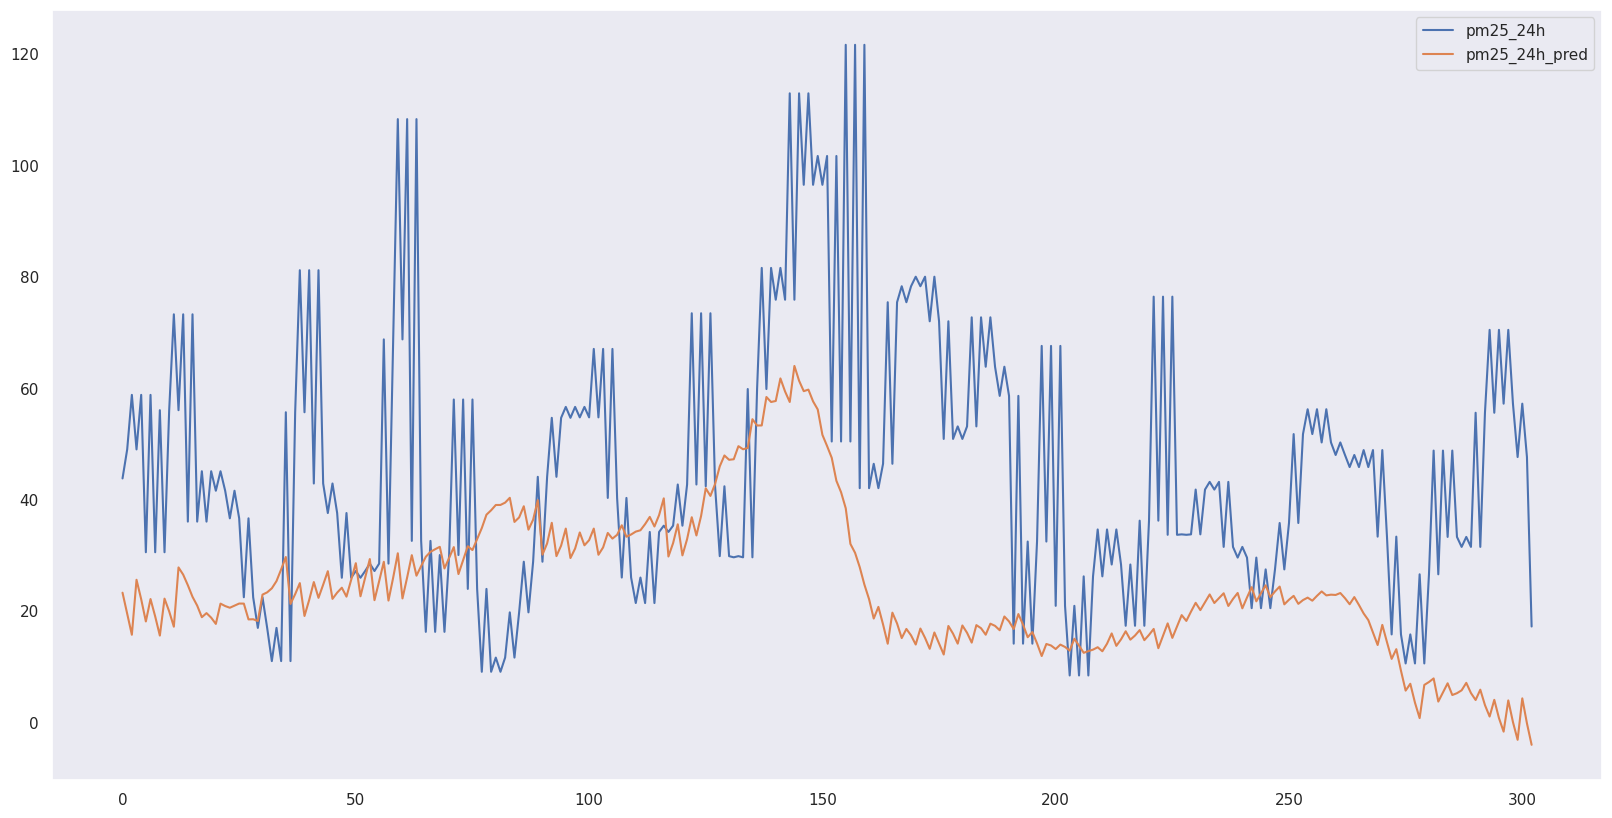

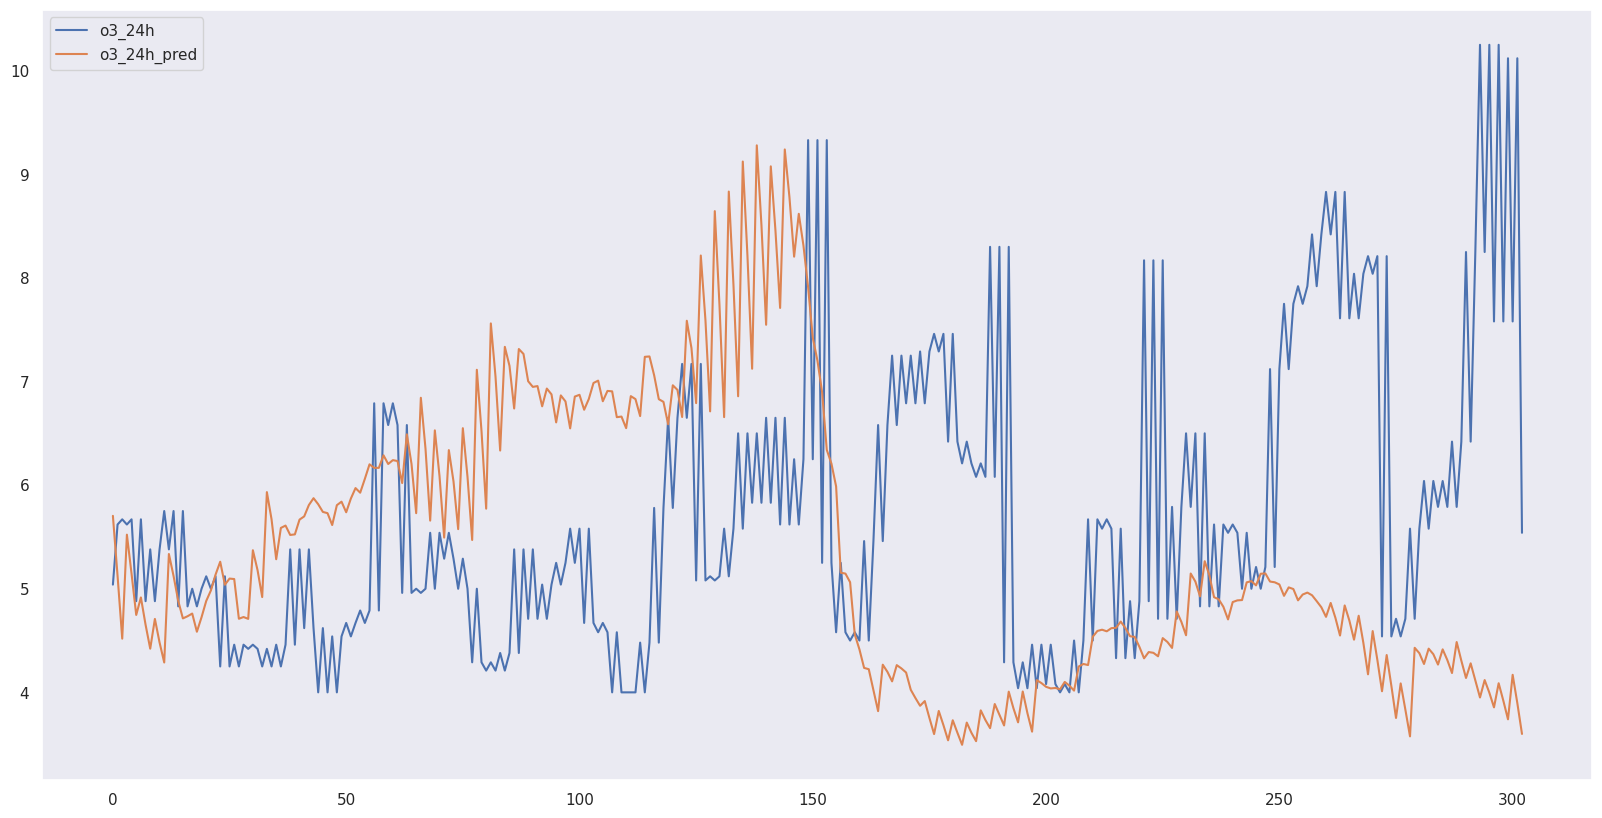

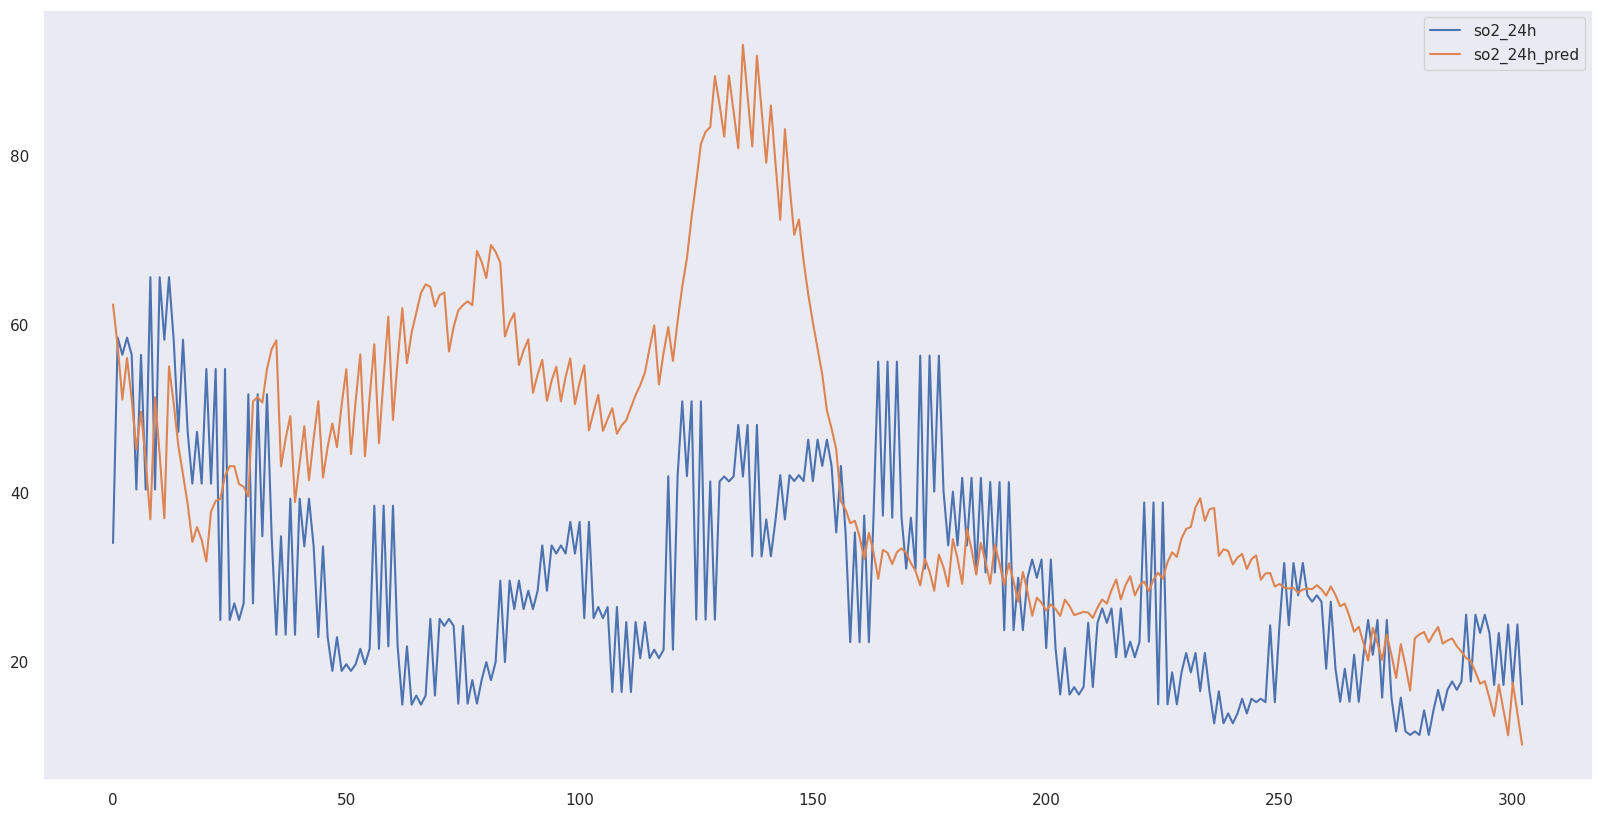

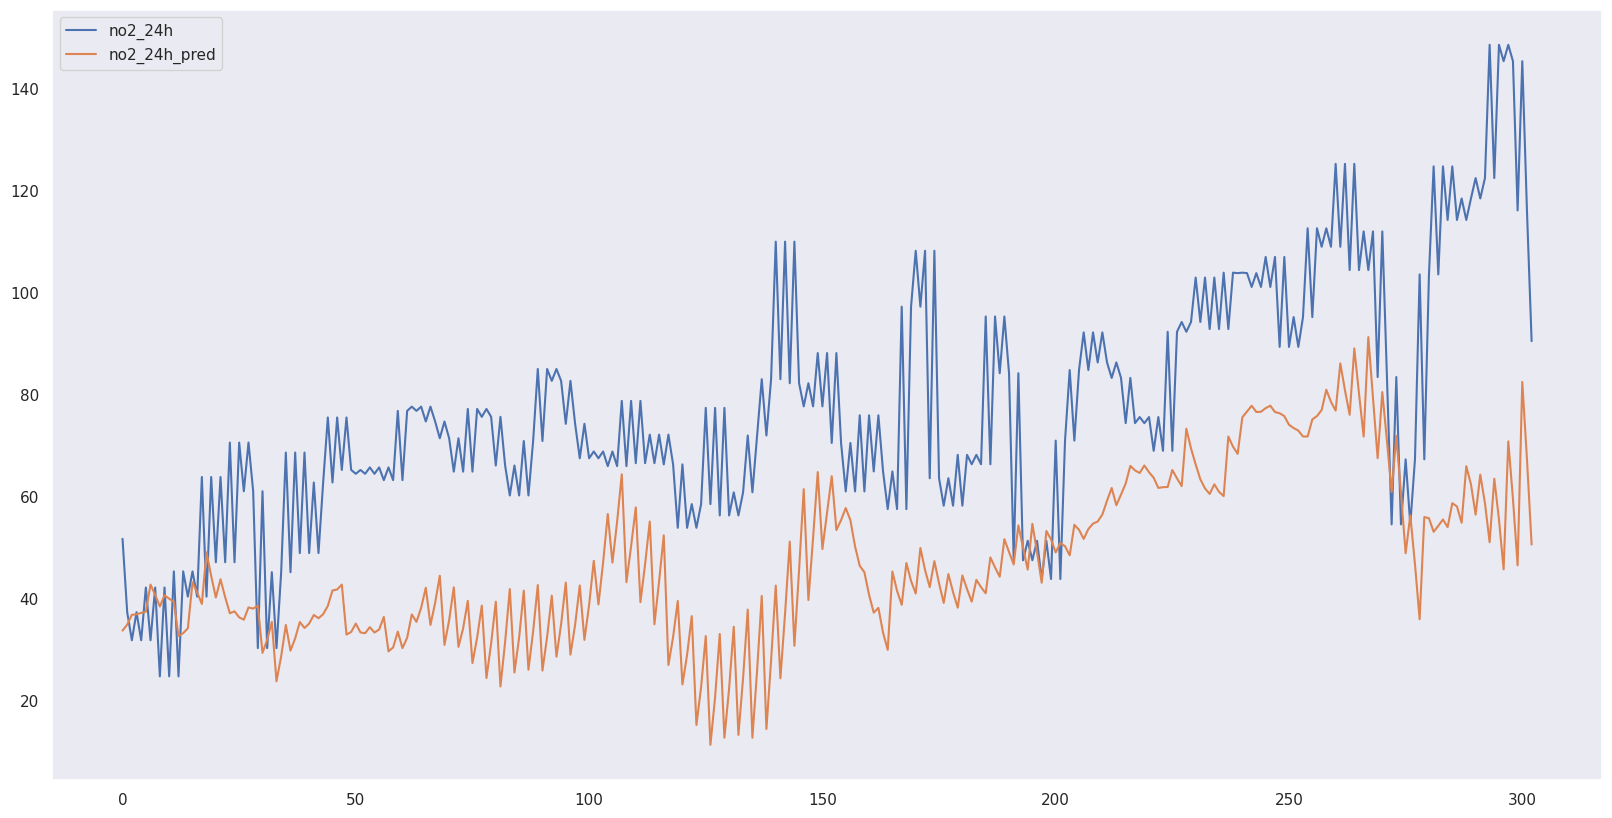

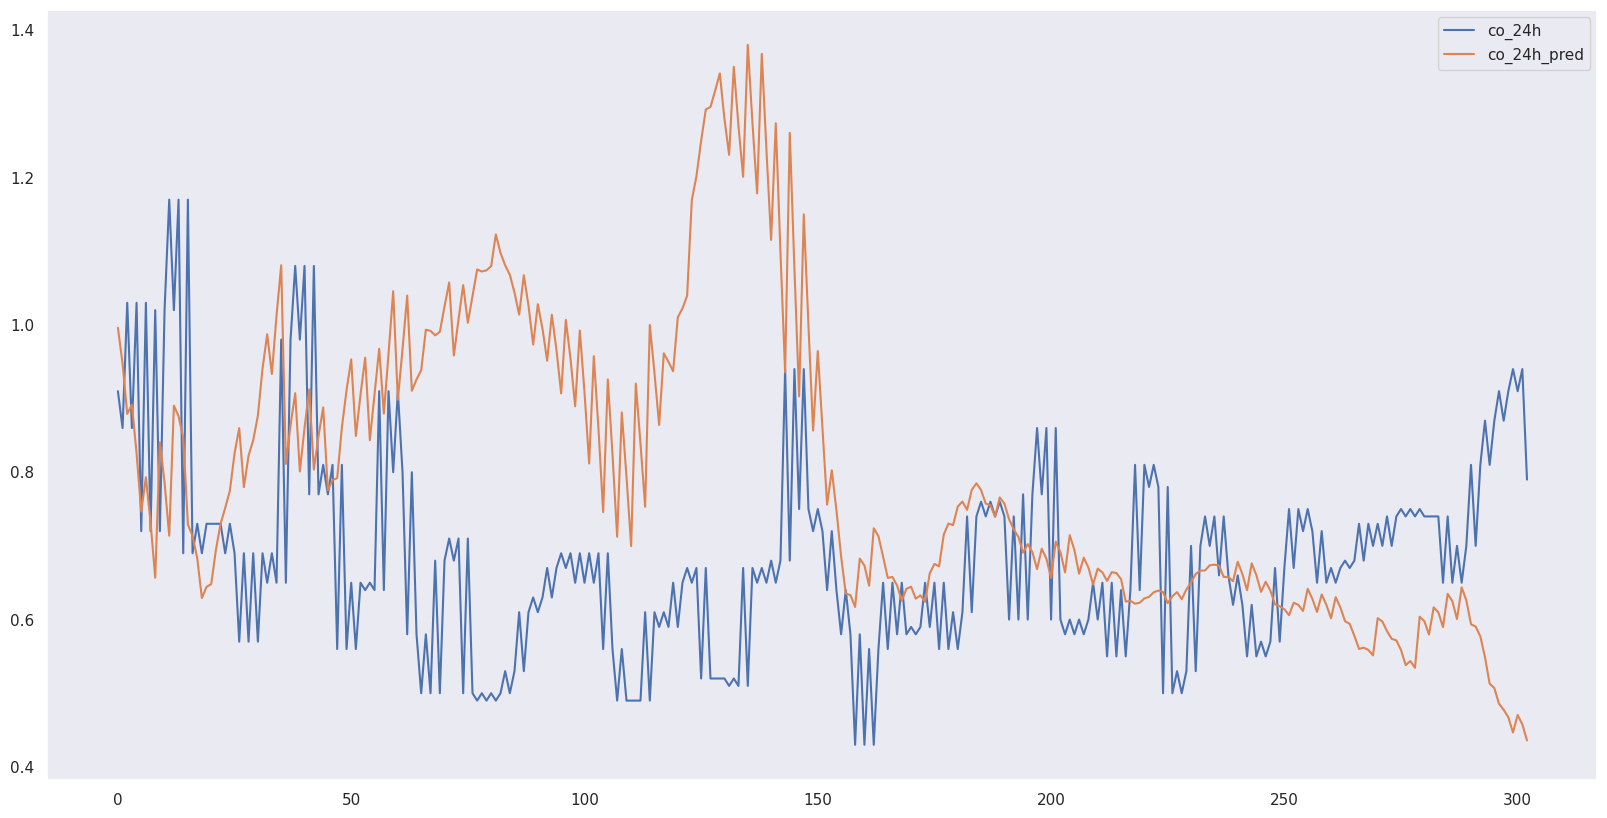

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_final[['aqi_24h', 'aqi_24h_pred']].plot()
df_final[['pm10_24h', 'pm10_24h_pred']].plot()
df_final[['pm25_24h', 'pm25_24h_pred']].plot()
df_final[['o3_24h', 'o3_24h_pred']].plot()
df_final[['so2_24h', 'so2_24h_pred']].plot()
df_final[['no2_24h', 'no2_24h_pred']].plot()
df_final[['co_24h', 'co_24h_pred']].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

indicator = ['aqi_24h', 'pm10_24h', 'pm25_24h', 'o3_24h', 'so2_24h', 'no2_24h', 'co_24h']
#print(f'n_step_in: {n_steps_in}, n_steps_out: {n_steps_out}, Epochs: {epoch}\n\n')
for i in indicator:
  rmse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'], squared=False)
  mse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'])
  mae = mean_absolute_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  mape = mean_absolute_percentage_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  print(f'{i} ----> RMSE: {rmse} ; MSE: {mse} ; MAE: {mae} ; MAPE: {mape}')

aqi_24h ----> RMSE: 26.250976402743035 ; MSE: 689.1137620973716 ; MAE: 20.590918449930626 ; MAPE: 0.44696880592142396
pm10_24h ----> RMSE: 27.24699519086962 ; MSE: 742.3987469312721 ; MAE: 20.36550614688263 ; MAPE: 1.0038095029224132
pm25_24h ----> RMSE: 31.951469263329013 ; MSE: 1020.8963880854587 ; MAE: 25.176404276295465 ; MAPE: 0.5483009760826283
o3_24h ----> RMSE: 2.124007112549312 ; MSE: 4.511406214160065 ; MAE: 1.659217378943667 ; MAPE: 0.27490837970927356
so2_24h ----> RMSE: 22.886755281486966 ; MSE: 523.8035673146716 ; MAE: 17.74242529714855 ; MAPE: 0.7345817084901626
no2_24h ----> RMSE: 35.56642846574306 ; MSE: 1264.970833808818 ; MAE: 30.51231779255882 ; MAPE: 0.3783445930356316
co_24h ----> RMSE: 0.28669302223135357 ; MSE: 0.08219288899614738 ; MAE: 0.2150069265042988 ; MAPE: 0.34278959769178535
